# Desafio DS - Lighthouse

# Visão Geral

Esse projeto tem como objetivo discorrer e demonstrar os passos efetuados para a construção do pipeline de previsão do dataset de séries temporais do índice GDP para os anos de 2024 a 2028.

Nesse notebook serão abordados os tópicos:

- **Exploratory Data Analysis (EDA)**
- **Feature Engineering**
- **Training**

## 1 EDA

## 1.1 Bibliotecas e Dados utilizados (Libraries and Data)

In [1]:
!pip install pmdarima

In [2]:
!pip install statsforecast

In [3]:
!pip install datasetsforecast

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
import random

In [5]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [6]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing

In [7]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, AutoCES, AutoTheta
from datasetsforecast.losses import mae, rmse

In [8]:
path = '/content/imf-dm-export-20230513.xls'

workbook = xlrd.open_workbook(path, ignore_workbook_corruption=True)
df_raw = pd.read_excel(workbook)

In [9]:
df_raw

Real GDP growth (Annual percent change)     1980     1981     1982  \
0                                       NaN      NaN      NaN      NaN   
1                               Afghanistan  no data  no data  no data   
2                                   Albania      2.7      5.7      2.9   
3                                   Algeria     -5.4        3      6.4   
4                                   Andorra  no data  no data  no data   
..                                      ...      ...      ...      ...   
226                Other advanced economies      3.8      4.2      2.2   
227                      Sub-Saharan Africa  no data  no data  no data   
228                                   World      2.1      1.9      0.7   
229                                     NaN      NaN      NaN      NaN   
230                              ©IMF, 2023      NaN      NaN      NaN   

        1983     1984     1985     1986     1987     1988     1989     1990  \
0        NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1    no data  no data  no data  no data  no data  no data  no data  no data   
2        1.1        2     -1.5      5.6     -0.8     -1.4      9.8      -10   
3        5.4      5.6      5.6     -0.2     -0.7     -1.9      4.8      0.8   
4    no data  no data  no data  no data  no data  no data  no data  no data   
..       ...      ...      ...      ...      ...      ...      ...      ...   
226        4      6.6      4.3      5.5      6.5      5.5      4.6      4.3   
227  no data  no data  no data  no data  no data  no data  no data  no data   
228      2.6      4.6      3.6      3.6      3.9      4.7      3.8      3.4   
229      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
230      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

        1991     1992     1993     1994     1995     1996     1997     1998  \
0        NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1    no data  no data  no data  no data  no data  no data  no data  no data   
2        -28     -7.2      9.6      9.4      8.9      9.1    -10.9      8.8   
3       -1.2      1.6     -2.1     -0.9      3.8      3.8      1.1      5.1   
4    no data  no data  no data  no data  no data  no data  no data  no data   
..       ...      ...      ...      ...      ...      ...      ...      ...   
226      3.7        4      4.2      6.2      5.3      4.9      4.7        1   
227      0.2        0      1.6      1.8      3.9      4.8      3.5      2.4   
228      2.7      2.3        2      3.2      3.3      3.9        4      2.6   
229      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
230      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

        1999     2000     2001     2002 2003 2004  2005 2006  2007 2008  2009  \
0        NaN      NaN      NaN      NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   
1    no data  no data  no data  no data  8.7  0.7  11.8  5.4  13.3  3.9  20.6   
2       12.9      6.9      8.3      4.5  5.5  5.5   5.5  5.9     6  7.5   3.4   
3        3.2      3.8        3      5.6  7.2  4.3   5.9  1.7   3.4  2.4   1.6   
4    no data  no data      8.1      4.5  8.7  8.1   5.4  4.8   1.6 -5.6  -5.3   
..       ...      ...      ...      ...  ...  ...   ...  ...   ...  ...   ...   
226      5.5      5.9      2.2      3.9  2.8  5.3   4.2  4.8   5.2  1.8  -0.9   
227      2.4        4      4.6      6.3  4.8  6.9   6.3    6   6.6  5.7   3.6   
228      3.5      4.8      2.5      2.9  4.3  5.4   4.9  5.4   5.6  3.1  -0.1   
229      NaN      NaN      NaN      NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   
230      NaN      NaN      NaN      NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   

    2010 2011 2012 2013 2014 2015 2016 2017 2018 2019  2020     2021     2022  \
0    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN      NaN      NaN   
1    8.4  6.5   14  5.7  2.7    1  2.2  2.6  1.2  3.9  -2.4  no data  no data   
2

In [10]:
df_raw.describe()

Real GDP growth (Annual percent change)     1980     1981     1982  \
count                                      229      228      228      228   
unique                                     229      115      104      104   
top                                Afghanistan  no data  no data  no data   
freq                                         1       59       55       54   

           1983     1984     1985     1986     1987     1988     1989  \
count       228      228      228      228      228      228      228   
unique      103      105      102      100      108      110      103   
top     no data  no data  no data  no data  no data  no data  no data   
freq         54       54       54       53       52       51       51   

           1990     1991     1992     1993     1994     1995     1996  \
count       228      228      228      228      228      228      228   
unique      113      127      119      130      119      113       99   
top     no data  no data  no data  no data  no data  no data  no data   
freq         51       40       37       25       23       21       18   

           1997     1998     1999     2000   2001   2002   2003  2004   2005  \
count       228      228      228      228  228.0  228.0  228.0   228  228.0   
unique      108      105      107      100  107.0  106.0  116.0   111  108.0   
top     no data  no data  no data  no data    2.7    1.6    6.9     5    5.7   
freq         18       15       12       12    7.0    7.0    7.0     6    6.0   

         2006  2007   2008  2009   2010   2011   2012   2013   2014  2015  \
count   228.0   228  228.0   228  228.0  228.0  228.0  228.0  228.0   228   
unique  108.0   113  113.0   131  115.0  107.0  115.0  106.0   95.0   100   
top       4.8     6    3.3     3    6.4    5.1    5.1    2.9    1.7     1   
freq      7.0     6    5.0     5    5.0    6.0    8.0    8.0    9.0     8   

         2016   2017   2018  2019   2020   2021  2022   2023  2024  2025  \
count   228.0  228.0  228.0   228  228.0  228.0   228  228.0   228   228   
unique   97.0   93.0   91.0    98  131.0  119.0   104   76.0    68    63   
top       2.2    2.5    2.8     2   -1.8    5.7     4    3.5     2     3   
freq      8.0    8.0   11.0     8    8.0    7.0     9   10.0     9    13   

        2026  2027  2028  
count    228   228   228  
unique    65    61    57  
top        3     3     3  
freq      14    17    15

In [11]:
df_raw.dtypes

Real GDP growth (Annual percent change)    object
1980                                       object
1981                                       object
1982                                       object
1983                                       object
1984                                       object
1985                                       object
1986                                       object
1987                                       object
1988                                       object
1989                                       object
1990                                       object
1991                                       object
1992                                       object
1993                                       object
1994                                       object
1995                                       object
1996                                       object
1997                                       object
1998                                       object


Feito o comando para detectar o tipo de coluna, observamos que o tipo das colunas está como object, tipo este que não nos é útil para a análise que devemos fazer, começar-se-á então as tratativas para que os dados passem a serem melhor interpretados. Nesse ponto iremos começar com a remoção dos valores nulos.

In [12]:
df_raw.isna().sum()

Real GDP growth (Annual percent change)    2
1980                                       3
1981                                       3
1982                                       3
1983                                       3
1984                                       3
1985                                       3
1986                                       3
1987                                       3
1988                                       3
1989                                       3
1990                                       3
1991                                       3
1992                                       3
1993                                       3
1994                                       3
1995                                       3
1996                                       3
1997                                       3
1998                                       3
1999                                       3
2000                                       3
2001      

In [13]:
df_dropna = df_raw.dropna()
df_dropna.isna().sum()

Real GDP growth (Annual percent change)    0
1980                                       0
1981                                       0
1982                                       0
1983                                       0
1984                                       0
1985                                       0
1986                                       0
1987                                       0
1988                                       0
1989                                       0
1990                                       0
1991                                       0
1992                                       0
1993                                       0
1994                                       0
1995                                       0
1996                                       0
1997                                       0
1998                                       0
1999                                       0
2000                                       0
2001      



Removido os valores nulos de todo Dataframe. O novo Dataframe criado passará a se chamar df_dropna.

Feito a remoção dos valores nulos, iremos trabalhar com os dados no data, que seriam as informações não lançadas no período. Existem diversos motivos para que essas informações não fossem lançadas, as mais pertinentes são: Diferenças metodológicas, diferenças de periodicidade, falta de um unicidade e comprovabilidade dos dados, e por fim, o fator imprevisibilidade, tais como guerras, catástrofes naturais e pandemias.


In [14]:
df_dropna[df_dropna == 'no data'].count()

Real GDP growth (Annual percent change)     0
1980                                       59
1981                                       55
1982                                       54
1983                                       54
1984                                       54
1985                                       54
1986                                       53
1987                                       52
1988                                       51
1989                                       51
1990                                       51
1991                                       40
1992                                       37
1993                                       25
1994                                       23
1995                                       21
1996                                       18
1997                                       18
1998                                       15
1999                                       12
2000                              

In [15]:
df_tratado = df_dropna.replace('no data', np.nan)
df_tratado.head(10)

Real GDP growth (Annual percent change)  1980  1981  1982  1983  1984  \
1                              Afghanistan   NaN   NaN   NaN   NaN   NaN   
2                                  Albania   2.7   5.7   2.9   1.1   2.0   
3                                  Algeria  -5.4   3.0   6.4   5.4   5.6   
4                                  Andorra   NaN   NaN   NaN   NaN   NaN   
5                                   Angola   2.4  -4.4   0.0   4.2   6.0   
6                      Antigua and Barbuda   8.2   3.8  -0.1   5.4  10.2   
7                                Argentina   0.7  -5.7  -3.1   3.7   2.0   
8                                  Armenia   NaN   NaN   NaN   NaN   NaN   
9                                    Aruba   NaN   NaN   NaN   NaN   NaN   
10                               Australia   2.9   4.1   0.1  -0.5   6.3   

    1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  \
1    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   -1.5   5.6  -0.8  -1.4   9.8 -10.0 -28.0  -7.2   9.6   9.4   8.9   9.1   
3    5.6  -0.2  -0.7  -1.9   4.8   0.8  -1.2   1.6  -2.1  -0.9   3.8   3.8   
4    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5    3.5   2.9   4.1   6.1   0.0  -3.5  12.1  11.4  11.0  10.5  10.4  11.2   
6    7.6  11.5   6.6   5.2   5.3   3.0   2.2   1.2   5.3   6.7  -4.4   6.6   
7   -7.0   7.1   2.5  -2.0  -7.0  -1.3  10.5  10.3   6.3   5.8  -2.8   5.5   
8    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -14.1   5.4   8.0   5.2   
9    NaN   NaN  16.1  18.6  12.1   4.0   8.0   5.9   7.3   8.2   2.5   1.3   
10   5.5   2.4   4.9   4.3   4.6   1.5  -1.0   2.6   3.9   4.8   3.0   4.0   

    1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
1    NaN   NaN   NaN   NaN   NaN   NaN   8.7   0.7  11.8   5.4  13.3   3.9   
2  -10.9   8.8  12.9   6.9   8.3   4.5   5.5   5.5   5.5   5.9   6.0   7.5   
3    1.1   5.1   3.2   3.8   3.0   5.6   7.2   4.3   5.9   1.7   3.4   2.4   
4    NaN   NaN   NaN   NaN   8.1   4.5   8.7   8.1   5.4   4.8   1.6  -5.6   
5    7.3   4.7   2.2   3.1   4.2  13.7   3.0  11.0  15.0  11.5  14.0  11.2   
6    5.5   4.7   3.7   6.2  -4.5   1.0   6.1   5.8   6.5  12.7   9.3   0.0   
7    8.1   3.9  -3.4  -0.8  -4.4 -10.9   9.0   8.9   8.9   8.0   9.0   4.1   
8    3.4   6.3   3.2   5.9   9.5  14.8  14.1  10.5  14.1  13.2  13.7   6.9   
9    7.0   2.0   1.4   7.7   4.2  -0.9   1.1   7.3  -0.4   1.1   3.1   1.8   
10   4.6   4.6   4.4   3.1   2.7   4.2   3.0   4.1   3.0   2.6   4.4   2.5   

    2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  \
1   20.6   8.4   6.5  14.0   5.7   2.7   1.0   2.2   2.6   1.2   3.9  -2.4   
2    3.4   3.7   2.5   1.4   1.0   1.8   2.2   3.3   3.8   4.0   2.1  -3.5   
3    1.6   3.6   2.9   3.4   2.8   3.8   3.7   3.2   1.4   1.2   1.0  -5.1   
4   -5.3  -2.0   0.0  -5.0  -3.5   2.5   1.4   3.7   0.3   1.6   2.0 -11.2   
5    0.9   4.9   3.5   8.5   5.0   4.8   0.9  -2.6  -0.2  -1.3  -0.7  -5.6   
6  -12.0  -7.8  -2.0   3.4  -0.6   3.8   3.8   5.5   3.1   6.9   4.9 -20.2   
7   -5.9  10.1   6.0  -1.0   2.4  -2.5   2.7  -2.1   2.8  -2.6  -2.0  -9.9   
8  -14.1   2.2   4.7   7.1   3.4   3.6   3.3   0.2   7.5   5.2   7.6  -7.2   
9  -11.7  -2.7   3.4  -1.0   6.4   0.0   3.6   2.1   5.5   5.3   0.6 -18.6   
10   1.9   2.4   2.8   3.8   2.2   2.6   2.3   2.7   2.4   2.8   1.9  -1.8   

    2021  2022  2023  2024  2025  2026  2027  2028  
1    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2    8.5   3.7   2.2   3.3   3.4   3.4   3.4   3.4  
3    3.4   2.9   2.6   2.6   2.2   2.1   1.7   1.8  
4    8.9   8.7   1.3   1.5   1.5   1.5   1.5   1.5  
5    1.1   2.8   3.5   3.7   4.0   4.1   4.2   4.2  
6    5.3   6.4   5.5   5.4   4.1   2.7   2.7   2.7  
7   10.4   5.2   0.2   2.0   2.0   2.0   2.0   2.0  
8    5.7  12.6   5.5   5.0   4.5   4.5   4.5   4.5  
9   17.2   5.7   1.6   1.2   1.2   1.1   1.1   1.1  
10   5.2   3.7   1.6   1.7   2.1   2.2   2.3   2.3

## 1.2 Corrigindo dados


In [16]:
df_tratado.replace(
    {
        "Bahamas, The":"The Bahamas",
        "China, People's Republic of":"China",
        "Congo, Dem. Rep. of the":"Dem. Rep. of the Congo",
        "Congo, Republic of ":"Republic of Congo",
        "Gambia, The":"The Gambia",
        "Korea, Republic of":"Republic of Korea",
        "Micronesia, Fed. States of":"Fed. States of Micronesia",
        "South Sudan, Republic of":"Republic of South Sudan",
        "Türkiye, Republic of":"Republic of Turkiye",
        "North Macedonia ":"North Macedonia",
        "Sub-Saharan Africa (Region) ": "Sub-Saharan Africa (Region)",
    },
    inplace = True)

df_tratado.rename(columns={"Real GDP growth (Annual percent change)":"Country"}, inplace=True)
df_tratado.head(10)

Country  1980  1981  1982  1983  1984  1985  1986  1987  1988  \
1           Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2               Albania   2.7   5.7   2.9   1.1   2.0  -1.5   5.6  -0.8  -1.4   
3               Algeria  -5.4   3.0   6.4   5.4   5.6   5.6  -0.2  -0.7  -1.9   
4               Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5                Angola   2.4  -4.4   0.0   4.2   6.0   3.5   2.9   4.1   6.1   
6   Antigua and Barbuda   8.2   3.8  -0.1   5.4  10.2   7.6  11.5   6.6   5.2   
7             Argentina   0.7  -5.7  -3.1   3.7   2.0  -7.0   7.1   2.5  -2.0   
8               Armenia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9                 Aruba   NaN   NaN   NaN   NaN   NaN   NaN   NaN  16.1  18.6   
10            Australia   2.9   4.1   0.1  -0.5   6.3   5.5   2.4   4.9   4.3   

    1989  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  \
1    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2    9.8 -10.0 -28.0  -7.2   9.6   9.4   8.9   9.1 -10.9   8.8  12.9   6.9   
3    4.8   0.8  -1.2   1.6  -2.1  -0.9   3.8   3.8   1.1   5.1   3.2   3.8   
4    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5    0.0  -3.5  12.1  11.4  11.0  10.5  10.4  11.2   7.3   4.7   2.2   3.1   
6    5.3   3.0   2.2   1.2   5.3   6.7  -4.4   6.6   5.5   4.7   3.7   6.2   
7   -7.0  -1.3  10.5  10.3   6.3   5.8  -2.8   5.5   8.1   3.9  -3.4  -0.8   
8    NaN   NaN   NaN   NaN -14.1   5.4   8.0   5.2   3.4   6.3   3.2   5.9   
9   12.1   4.0   8.0   5.9   7.3   8.2   2.5   1.3   7.0   2.0   1.4   7.7   
10   4.6   1.5  -1.0   2.6   3.9   4.8   3.0   4.0   4.6   4.6   4.4   3.1   

    2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
1    NaN   NaN   8.7   0.7  11.8   5.4  13.3   3.9  20.6   8.4   6.5  14.0   
2    8.3   4.5   5.5   5.5   5.5   5.9   6.0   7.5   3.4   3.7   2.5   1.4   
3    3.0   5.6   7.2   4.3   5.9   1.7   3.4   2.4   1.6   3.6   2.9   3.4   
4    8.1   4.5   8.7   8.1   5.4   4.8   1.6  -5.6  -5.3  -2.0   0.0  -5.0   
5    4.2  13.7   3.0  11.0  15.0  11.5  14.0  11.2   0.9   4.9   3.5   8.5   
6   -4.5   1.0   6.1   5.8   6.5  12.7   9.3   0.0 -12.0  -7.8  -2.0   3.4   
7   -4.4 -10.9   9.0   8.9   8.9   8.0   9.0   4.1  -5.9  10.1   6.0  -1.0   
8    9.5  14.8  14.1  10.5  14.1  13.2  13.7   6.9 -14.1   2.2   4.7   7.1   
9    4.2  -0.9   1.1   7.3  -0.4   1.1   3.1   1.8 -11.7  -2.7   3.4  -1.0   
10   2.7   4.2   3.0   4.1   3.0   2.6   4.4   2.5   1.9   2.4   2.8   3.8   

    2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  2024  \
1    5.7   2.7   1.0   2.2   2.6   1.2   3.9  -2.4   NaN   NaN   NaN   NaN   
2    1.0   1.8   2.2   3.3   3.8   4.0   2.1  -3.5   8.5   3.7   2.2   3.3   
3    2.8   3.8   3.7   3.2   1.4   1.2   1.0  -5.1   3.4   2.9   2.6   2.6   
4   -3.5   2.5   1.4   3.7   0.3   1.6   2.0 -11.2   8.9   8.7   1.3   1.5   
5    5.0   4.8   0.9  -2.6  -0.2  -1.3  -0.7  -5.6   1.1   2.8   3.5   3.7   
6   -0.6   3.8   3.8   5.5   3.1   6.9   4.9 -20.2   5.3   6.4   5.5   5.4   
7    2.4  -2.5   2.7  -2.1   2.8  -2.6  -2.0  -9.9  10.4   5.2   0.2   2.0   
8    3.4   3.6   3.3   0.2   7.5   5.2   7.6  -7.2   5.7  12.6   5.5   5.0   
9    6.4   0.0   3.6   2.1   5.5   5.3   0.6 -18.6  17.2   5.7   1.6   1.2   
10   2.2   2.6   2.3   2.7   2.4   2.8   1.9  -1.8   5.2   3.7   1.6   1.7   

    2025  2026  2027  2028  
1    NaN   NaN   NaN   NaN  
2    3.4   3.4   3.4   3.4  
3    2.2   2.1   1.7   1.8  
4    1.5   1.5   1.5   1.5  
5    4.0   4.1   4.2   4.2  
6    4.1   2.7   2.7   2.7  
7    2.0   2.0   2.0   2.0  
8    4.5   4.5   4.5   4.5  
9    1.2   1.1   1.1   1.1  
10   2.1   2.2   2.3   2.3

In [17]:
dados = df_tratado.describe().T
dados

count      mean        std   min    25%   50%    75%    max
1980  169.0  2.872189   5.417190 -21.6  0.100  3.30  5.800   18.8
1981  173.0  2.444509   5.465041 -20.0  0.100  2.60  5.500   17.1
1982  174.0  1.303448   5.964451 -36.8 -0.800  1.50  4.100   23.2
1983  174.0  1.936782   5.150310 -16.1 -1.000  2.40  4.600   22.7
1984  174.0  4.177586   6.281408 -16.8  1.925  4.10  6.100   44.5
1985  174.0  3.129310   4.490556 -13.0  1.100  3.50  5.300   24.3
1986  175.0  3.742286   4.436724 -19.3  1.950  3.60  6.100   18.6
1987  176.0  3.710227   4.966437 -15.4  1.500  3.60  5.900   22.0
1988  177.0  4.140678   5.652045 -28.2  1.700  4.20  6.900   23.4
1989  177.0  3.468362   5.947604 -42.2  1.400  3.80  5.400   25.9
1990  177.0  2.874011   5.419630 -26.2  0.600  3.40  5.600   23.6
1991  188.0  2.045745   7.241771 -41.0 -0.200  2.30  5.800   38.2
1992  191.0  2.821990   9.180880 -44.9  0.300  2.80  6.500   82.8
1993  203.0  1.832512   6.422988 -29.3 -0.550  2.30  5.200   35.1
1994  205.0  2.292683   7.260165 -41.9  1.500  3.50  5.600   20.9
1995  207.0  3.728019   5.238050 -15.4  2.150  3.90  6.300   26.5
1996  210.0  4.325238   6.673405 -24.8  1.925  4.05  6.000   62.2
1997  210.0  4.736667  10.987311 -17.6  2.600  4.30  5.975  148.0
1998  213.0  3.168545   4.371239 -22.4  2.000  3.50  5.000   24.8
1999  216.0  3.337500   4.438346 -12.1  1.475  3.30  4.700   26.4
2000  216.0  4.496296   8.178178 -14.3  2.775  4.20  5.900  110.5
2001  223.0  3.481166   5.447779  -9.3  1.300  3.00  4.950   60.0
2002  224.0  3.397768   4.374236 -12.5  1.400  3.45  5.300   26.4
2003  225.0  4.779111   7.140519 -29.0  2.200  4.30  6.900   81.8
2004  225.0  5.798667   5.590525  -6.3  3.100  5.00  7.300   53.4
2005  226.0  5.059735   3.977070 -13.1  2.925  4.90  7.000   28.0
2006  226.0  5.622124   4.407695  -8.3  3.500  5.40  7.375   34.5
2007  226.0  5.726549   3.825889  -6.8  3.300  5.70  7.775   25.5
2008  226.0  4.069469   5.795139 -19.4  1.425  4.00  6.100   63.3
2009  226.0  0.012389   5.390314 -15.1 -3.400  0.10  3.300   20.6
2010  226.0  4.540708   4.246382  -8.9  2.225  4.50  6.900   25.1
2011  225.0  3.975556   5.501345 -50.3  1.900  4.10  6.300   25.7
2012  227.0  3.544053   7.881147 -50.3  1.100  3.40  5.500   86.8
2013  227.0  3.234361   4.724429 -36.4  1.400  3.40  5.200   27.3
2014  227.0  3.406167   3.766534 -23.0  1.650  3.30  5.000   30.9
2015  227.0  2.649339   4.740471 -28.0  1.550  3.00  4.650   24.4
2016  227.0  2.802643   3.586083 -17.0  1.600  3.00  4.700   15.2
2017  227.0  3.177533   3.817064 -15.7  1.750  3.30  4.800   32.5
2018  227.0  3.205286   3.048657 -19.7  1.800  3.20  4.800   14.6
2019  227.0  2.588987   3.519304 -27.7  1.250  2.60  4.500   13.8
2020  227.0 -4.726872   7.596170 -54.2 -7.150 -3.60 -1.450   43.5
2021  225.0  5.449778   5.266989 -17.9  3.100  5.20  7.400   41.7
2022  225.0  3.948000   6.059085 -30.3  2.400  3.80  5.700   62.3
2023  225.0  3.389333   4.891298  -3.0  1.500  2.90  4.400   58.9
2024  224.0  3.700000   3.685251  -8.2  2.000  3.15  4.500   45.3
2025  223.0  3.427803   1.765342  -8.6  2.300  3.20  4.400    8.6
2026  223.0  3.526009   2.790709  -1.6  2.200  3.00  4.300   36.6
2027  223.0  3.316143   1.713988  -1.1  2.200  3.00  4.300   15.5
2028  223.0  3.298206   1.676654  -0.5  2.200  3.00  4.300   14.5

<Axes: title={'center': 'Visualização primária dos Dados'}, xlabel='Anos', ylabel='GDP Index'>

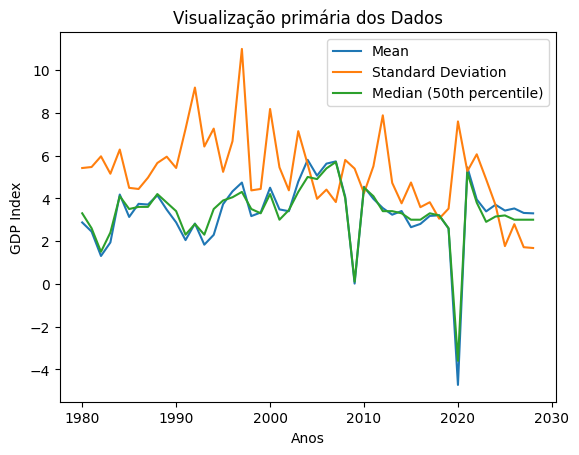

In [18]:
plt.title('Visualização primária dos Dados')
plt.xlabel('Anos')
plt.ylabel('GDP Index')
sns.lineplot(x = dados.index, y = 'mean', label = 'Mean', data = dados)
sns.lineplot(x = dados.index, y = 'std', label = 'Standard Deviation', data = dados)
sns.lineplot(x = dados.index, y = '50%', label = 'Median (50th percentile)', data = dados)


Visualizando graficamente a média e mediana, notamos que ambos andam próximas ao longo de todos os anos.

As estatísticas acima indicam que a média é uma abordagem segura de imputação de dados, mas pela variabilidade presente, é interessante pensar em novas estratégias que englobem uma visão mais micro para os países faltantes.

A partir daqui se inicia a análise dos dados faltantes.


## 1.3 Transformando dados


In [19]:
df_transpose = df_tratado.transpose()
df_transpose = df_tratado.set_index('Country').transpose().reset_index(names=['Year']).rename_axis('', axis=1)
df_transpose.head()

Year  Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
0  1980          NaN      2.7     -5.4      NaN     2.4                  8.2   
1  1981          NaN      5.7      3.0      NaN    -4.4                  3.8   
2  1982          NaN      2.9      6.4      NaN     0.0                 -0.1   
3  1983          NaN      1.1      5.4      NaN     4.2                  5.4   
4  1984          NaN      2.0      5.6      NaN     6.0                 10.2   

   Argentina  Armenia  Aruba  Australia  Austria  Azerbaijan  The Bahamas  \
0        0.7      NaN    NaN        2.9      2.3         NaN          7.1   
1       -5.7      NaN    NaN        4.1     -0.1         NaN         -2.9   
2       -3.1      NaN    NaN        0.1      1.9         NaN          6.3   
3        3.7      NaN    NaN       -0.5      2.8         NaN          6.8   
4        2.0      NaN    NaN        6.3      0.3         NaN          2.4   

   Bahrain  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  Bhutan  \
0      7.5         NaN       4.4      NaN      4.4     5.0    9.3     5.0   
1      2.8         3.8      -1.9      NaN     -0.3     0.2    1.9    13.6   
2      6.4         2.4      -4.9      4.0      0.6    -7.6    1.7     8.2   
3      7.0         4.0       0.5      4.3      0.3     6.1   -2.0     7.3   
4      4.2         5.2       3.6      3.0      2.5    11.3    0.4     7.6   

   Bolivia  Bosnia and Herzegovina  Botswana  Brazil  Brunei Darussalam  \
0      0.6                     NaN      12.0     9.2                NaN   
1      0.3                     NaN       8.2    -4.4                NaN   
2     -3.9                     NaN      15.9     0.6                NaN   
3     -4.0                     NaN      10.8    -3.4                NaN   
4     -0.2                     NaN       6.5     5.3                NaN   

   Bulgaria  Burkina Faso  Burundi  Cabo Verde  Cambodia  Cameroon  Canada  \
0       5.7           4.0     -6.8         5.3       NaN       9.9     2.2   
1       5.3           2.7     12.2         8.4       NaN      17.1     3.5   
2       4.2           1.4     -1.1         2.8       NaN       7.6    -3.2   
3       3.0          -1.2      3.7         9.5       NaN       6.8     2.6   
4       4.6           1.6      0.2         3.8       NaN       7.5     5.9   

   Central African Republic  Chad  Chile  China  Colombia  Comoros  \
0                      -3.0  -6.0    7.9    7.9       4.4      7.4   
1                      13.0 -10.8    6.2    5.1       2.3      5.5   
2                      -3.6   5.4  -13.6    9.0       0.9      4.1   
3                      -6.0  15.7   -2.8   10.8       1.6      3.1   
4                       9.9   5.3    5.9   15.2       3.4      4.2   

   Dem. Rep. of the Congo  Republic of Congo  Costa Rica  Croatia  Cyprus  \
0                     2.4               12.7         0.8      NaN     5.9   
1                     0.9                2.6        -2.3      NaN     3.1   
2                    -0.5                2.4        -7.3      NaN     6.3   
3                     1.4                2.4         2.9      NaN     5.3   
4                     4.8                2.4         8.0      NaN     8.8   

   Czech Republic  Côte d'Ivoire  Denmark  Djibouti  Dominica  \
0             NaN            5.2     -0.5       NaN      13.4   
1             NaN            3.5     -0.7       NaN      10.8   
2             NaN            0.2      3.7       NaN       4.1   
3             NaN           -2.5      2.6       NaN       2.6   
4             NaN           -2.0      4.2       NaN       4.2   

   Dominican Republic  Ecuador  Egypt  El Salvador  Equatorial Guinea  \
0                 8.0      4.9    3.4         -8.6                4.8   
1                 4.3      3.9    2.2         -5.7                5.8   
2                 1.7      1.2    7.3         -6.3                2.2   
3                 4.6     -2.8    8.9          1.5                5.0   
4                 1.3      4.2    8.

## 2 Criando categoria de dados


Criamos grupos de divisão por seu grupo econômico, segundo os dados do
Internetional Monetary Fund ([site](https://www.imf.org/en/Publications/WEO/weo-database/2023/April/groups-and-aggregates#lac)).

### 2.1 Economias Mundiais


In [20]:
major_advanced_economies_G7= ["Major advanced economies (G7)",
"Canada",
"France",
"Germany",
"Italy",
"Japan",
"United Kingdom",
"United States",]

other_advanced_economies = ["Other advanced economies",
"Andorra",
"Aruba",
"Hong Kong SAR",
"Macao SAR",
"San Marino"]

emerging_market_and_developing_economies = ["Emerging market and developing economies",
"Bangladesh",
"Belarus",
"Bulgaria",
"Chile",
"China",
"Colombia",
"Costa Rica",
"Croatia",
"Czech Republic",
"Dominican Republic",
"Egypt",
"El Salvador",
"Hungary",
"India",
"Indonesia",
"Iran",
"Jordan",
"Kenya",
"Lebanon",
"Malaysia",
"Mexico",
"Nigeria",
"Pakistan",
"Panama",
"Peru",
"Philippines",
"Poland",
"Romania",
"Russian Federation",
"Saudi Arabia",
"South Africa",
"Sri Lanka",
"Thailand",
"Republic of Turkiye",
"Ukraine",
"Venezuela",
"Vietnam"]

advanced_economies = ["Advanced economies",
"Andorra",
"Aruba",
"Australia",
"Austria",
"Bahrain",
"Belgium",
"Canada",
"Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"Hong Kong SAR",
"Iceland",
"Ireland",
"Israel",
"Italy",
"Japan",
"Republic of Korea",
"Kuwait",
"Latvia",
"Lithuania",
"Luxembourg",
"Macao SAR",
"Malta",
"Netherlands",
"New Zealand",
"Norway",
"Oman",
"Portugal",
"Puerto Rico",
"Qatar",
"San Marino",
"Singapore",
"Slovak Republic",
"Slovenia",
"Spain",
"Sweden",
"Switzerland",
"Taiwan Province of China",
"United Arab Emirates",
"United Kingdom",
"United States"]

emerging_and_developing_europe = ["Emerging and Developing Europe"
,"Bulgaria",
"Croatia",
"Hungary",
"Poland",
"Romania",
"Russian Federation",
"Republic of Turkiye",
"Ukraine"]

asean_5 = ["ASEAN-5",
"Indonesia",
"Malaysia",
"Philippines",
"Singapore",
"Thailand"]

### 2.1.2 Africa


In [21]:
sub_saharan_africa_region = ["Sub-Saharan Africa (Region)",
"Angola",
"Benin",
"Botswana",
"Burkina Faso",
"Burundi",
"Cabo Verde",
"Cameroon",
"Central African Republic",
"Chad",
"Comoros",
"Dem. Rep. of the Congo",
"Republic of Congo",
"Côte d'Ivoire",
"Djibouti",
"Equatorial Guinea",
"Eritrea",
"Eswatini",
"Ethiopia",
"Gabon",
"The Gambia",
"Ghana",
"Guinea",
"Guinea-Bissau",
"Kenya",
"Lesotho",
"Liberia",
"Madagascar",
"Malawi",
"Mali",
"Mauritania",
"Mauritius",
"Mozambique",
"Namibia",
"Niger",
"Nigeria",
"Rwanda",
"São Tomé and Príncipe",
"Senegal",
"Seychelles",
"Sierra Leone",
"Somalia",
"South Africa",
"Republic of South Sudan",
"Sudan",
"Tanzania",
"Togo",
"Uganda",
"Zambia",
"Zimbabwe"]

sub_saharan_africa = ["Sub-Saharan Africa",
"Angola",
"Benin",
"Botswana",
"Burkina Faso",
"Burundi",
"Cabo Verde",
"Cameroon",
"Central African Republic",
"Chad",
"Comoros",
"Dem. Rep. of the Congo",
"Republic of Congo",
"Côte d'Ivoire",
"Djibouti",
"Equatorial Guinea",
"Eritrea",
"Eswatini",
"Ethiopia",
"Gabon",
"The Gambia",
"Ghana",
"Guinea",
"Guinea-Bissau",
"Kenya",
"Lesotho",
"Liberia",
"Madagascar",
"Malawi",
"Mali",
"Mauritania",
"Mauritius",
"Mozambique",
"Namibia",
"Niger",
"Nigeria",
"Rwanda",
"São Tomé and Príncipe",
"Senegal",
"Seychelles",
"Sierra Leone",
"Somalia",
"South Africa",
"Republic of South Sudan",
"Sudan",
"Tanzania",
"Togo",
"Uganda",
"Zambia",
"Zimbabwe"]

north_africa = ["North Africa",
"Algeria",
"Egypt",
"Libya",
"Morocco",
"Sudan",
"Tunisia"]

africa = ["Africa (Region)",
"Algeria",
"Egypt",
"Libya",
"Morocco",
"Tunisia",
"Angola",
"Benin",
"Botswana",
"Burkina Faso",
"Burundi",
"Cabo Verde",
"Cameroon",
"Central African Republic",
"Chad",
"Comoros",
"Dem. Rep. of the Congo",
"Republic of Congo",
"Côte d'Ivoire",
"Djibouti",
"Equatorial Guinea",
"Eritrea",
"Eswatini",
"Ethiopia",
"Gabon",
"The Gambia",
"Ghana",
"Guinea",
"Guinea-Bissau",
"Kenya",
"Lesotho",
"Liberia",
"Madagascar",
"Malawi",
"Mali",
"Mauritania",
"Mauritius",
"Mozambique",
"Namibia",
"Niger",
"Nigeria",
"Rwanda",
"São Tomé and Príncipe",
"Senegal",
"Seychelles",
"Sierra Leone",
"Somalia",
"South Africa",
"Republic of South Sudan",
"Sudan",
"Tanzania",
"Togo",
"Uganda",
"Zambia",
"Zimbabwe"]
africa = sorted(africa)

### 2.1.3 Europa


In [22]:
euro_area = ["Euro area",
"Austria",
"Belgium",
"Cyprus",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"Ireland",
"Italy",
"Latvia",
"Lithuania",
"Luxembourg",
"Malta",
"Netherlands",
"Portugal",
"Slovak Republic",
"Slovenia",
"Spain"]

european_union = ["European Union",
"Austria",
"Belgium",
"Bulgaria",
"Croatia",
"Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"Hungary",
"Ireland",
"Italy",
"Latvia",
"Lithuania",
"Luxembourg",
"Malta",
"Netherlands",
"Poland",
"Portugal",
"Romania",
"Slovak Republic",
"Slovenia",
"Spain",
"Sweden"]

europe = ["Europe",
"Albania",
"Andorra",
"Armenia",
"Austria",
"Azerbaijan",
"Belarus",
"Belgium",
"Bosnia and Herzegovina",
"Bulgaria",
"Croatia",
"Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Georgia",
"Germany",
"Greece",
"Hungary",
"Iceland",
"Ireland",
"Italy",
"Kazakhstan",
"Kosovo",
"Latvia",
"Lithuania",
"Luxembourg",
"Malta",
"Moldova",
"Montenegro",
"Netherlands",
"North Macedonia",
"Norway",
"Poland",
"Portugal",
"Romania",
"Russian Federation",
"San Marino",
"Serbia",
"Slovak Republic",
"Slovenia",
"Spain",
"Sweden",
"Switzerland",
"Republic of Turkiye",
"Ukraine",
"United Kingdom"]

western_europe = ["Western Europe",
"Andorra",
"Austria",
"Belgium",
"France",
"Germany",
"Luxembourg",
"Netherlands",
"Switzerland"]

### 2.1.4  Ásia


In [23]:
emerging_and_developing_asia = ["Emerging and Developing Asia",
"Bangladesh",
"China",
"India",
"Indonesia",
"Iran",
"Jordan",
"Lebanon",
"Malaysia",
"Pakistan",
"Philippines",
"Sri Lanka",
"Thailand",
"Republic of Turkiye",
"Vietnam"]

middle_east = ["Middle East (Region)",
"Bahrain",
"Iran",
"Iraq",
"Israel",
"Jordan",
"Kuwait",
"Lebanon",
"Oman",
"Qatar",
"Saudi Arabia",
"Syria",
"United Arab Emirates",
"Yemen"]

southeast_asia = ["Southeast Asia",
"Brunei Darussalam",
"Cambodia",
"Indonesia",
"Lao P.D.R.",
"Malaysia",
"Myanmar",
"Philippines",
"Singapore",
"Thailand",
"Timor-Leste",
"Vietnam"]

south_asia = ["South Asia",
"Afghanistan",
"Bangladesh",
"Bhutan",
"India",
"Nepal",
"Pakistan",
"Sri Lanka"]

east_asia = ["East Asia",
"China",
"Japan",
"Republic of Korea",
"Taiwan Province of China"]

### 2.1.5 Ilhas do Pacífico


In [24]:
pacific_islands = ["Pacific Islands ",
"Fiji",
"Kiribati",
"Marshall Islands",
"Fed. States of Micronesia",
"Nauru",
"Palau",
"Papua New Guinea",
"Solomon Islands",
"Tonga",
"Tuvalu",
"Vanuatu"]

### 2.1.6 Austália e Nova Zelândia


In [25]:
australia_and_new_zealand = ["Australia and New Zealand",
    "Australia",
    "New Zealand"]

### 2.1.7 América

In [26]:
south_america = ["South America",
"Antigua and Barbuda",
"Argentina",
"Bolivia",
"Brazil",
"Chile",
"Colombia",
"Ecuador",
"Guyana",
"Paraguay",
"Peru",
"Suriname",
"Uruguay",
"Venezuela"]

north_america = ["North America",
"Canada",
"United States"]

central_america = ["Central America",
"Belize",
"Costa Rica",
"El Salvador",
"Guatemala",
"Honduras",
"Nicaragua",
"Panama",
"Argentina",
"Bolivia",
"Brazil",
"Chile",
"Colombia",
"Ecuador",
"Guyana",
"Paraguay",
"Peru",
"Suriname",
"Uruguay",
"Venezuela",]

### 2.1.8 Caribe

In [27]:
caribbean = ["Caribbean",
"Antigua and Barbuda",
"The Bahamas",
"Barbados",
"Dominica",
"Dominican Republic",
"Grenada",
"Haiti",
"Jamaica",
"Saint Kitts and Nevis",
"Saint Lucia",
"Saint Vincent and the Grenadines",
"Trinidad and Tobago"]

### 2.1.9 Continentes / Grupo de Continentes

In [28]:
western_hemisphere = ["Western Hemisphere (Region)",
"Argentina",
"The Bahamas",
"Barbados",
"Belize",
"Bolivia",
"Brazil",
"Canada",
"Chile",
"Colombia",
"Costa Rica",
"Dominica",
"Dominican Republic",
"Ecuador",
"El Salvador",
"Grenada",
"Guatemala",
"Guyana",
"Haiti",
"Honduras",
"Jamaica",
"Mexico",
"Nicaragua",
"Panama",
"Paraguay",
"Peru",
"Saint Kitts and Nevis",
"Saint Lucia",
"Saint Vincent and the Grenadines",
"Suriname",
"Trinidad and Tobago",
"United States",
"Uruguay",
"Venezuela"]

asia_and_pacific = ["Asia and Pacific",
"Afghanistan",
"Bangladesh",
"Bhutan",
"Brunei Darussalam",
"Cambodia",
"China",
"Fiji",
"India",
"Indonesia",
"Iran",
"Japan",
"Kazakhstan",
"Kiribati",
"Kyrgyz Republic",
"Lao P.D.R.",
"Malaysia",
"Maldives",
"Marshall Islands",
"Fed. States of Micronesia",
"Mongolia",
"Myanmar",
"Nauru",
"Nepal",
"New Zealand",
"Pakistan",
"Palau",
"Papua New Guinea",
"Philippines",
"Samoa",
"Singapore",
"Solomon Islands",
"Republic of Korea",
"Sri Lanka",
"Taiwan Province of China",
"Tajikistan",
"Thailand",
"Timor-Leste",
"Tonga",
"Turkmenistan",
"Tuvalu",
"Uzbekistan",
"Vanuatu",
"Vietnam",
"Belize",
"Costa Rica",
"El Salvador",
"Guatemala",
"Honduras",
"Nicaragua",
"Panama"]

middle_east_and_central_asia = ["Middle East and Central Asia",
"Afghanistan",
"Armenia",
"Azerbaijan",
"Bahrain",
"Iran",
"Iraq",
"Israel",
"Jordan",
"Kazakhstan",
"Kuwait",
"Kyrgyz Republic",
"Lebanon",
"Oman",
"Pakistan",
"Qatar",
"Saudi Arabia",
"Syria",
"Tajikistan",
"Turkmenistan",
"United Arab Emirates",
"Uzbekistan",
"Yemen"]

middle_east = ["Middle East (Region)",
"Armenia",
"Bahrain",
"Iran",
"Iraq",
"Israel",
"Jordan",
"Kuwait",
"Lebanon",
"Oman",
"Qatar",
"Saudi Arabia",
"Syria",
"United Arab Emirates",
"Yemen",
"West Bank and Gaza"]

central_asia_and_the_caucasus = ["Central Asia and the Caucasus",
"Armenia",
"Azerbaijan",
"Georgia",
"Kazakhstan",
"Kyrgyz Republic",
"Tajikistan",
"Turkmenistan",
"Uzbekistan"]

latin_america_and_the_caribbean = ["Latin America and the Caribbean",
"Antigua and Barbuda",
"Argentina",
"The Bahamas",
"Barbados",
"Belize",
"Bolivia",
"Brazil",
"Chile",
"Colombia",
"Costa Rica",
"Dominica",
"Dominican Republic",
"Ecuador",
"El Salvador",
"Grenada",
"Guatemala",
"Guyana",
"Haiti",
"Honduras",
"Jamaica",
"Mexico",
"Nicaragua",
"Panama",
"Paraguay",
"Peru",
"Saint Kitts and Nevis",
"Saint Lucia",
"Saint Vincent and the Grenadines",
"Suriname",
"Trinidad and Tobago",
"Uruguay",
"Venezuela"]

### 2.2 Função de plotagem gráfica

Feito uma função python para plotagem gráfica.

Porém será apenas demosntrado um conjunto gráfico, para fins de avaliação.

In [29]:
def plot_graph(df,dict_list, print_null = True):
    for key in dict_list.keys():
        plt.figure(figsize=(10,3), dpi=100)
        list_groups = []

        for value in dict_list[key]:
            plt.plot(df['Year'], df[value])
            if df[value].isnull().values.any():
                list_groups.append(value)

        if print_null:
            print('With null values: ', key,list_groups)

        plt.title(key)
        ax = plt.subplot(111)
        ax.legend(dict_list[key],loc='upper center', bbox_to_anchor=(1.3, 1.05), ncol=2, fancybox=True, shadow=True)

In [30]:
dict_list = {
        "major_advanced_economies_G7": major_advanced_economies_G7,
        "other_advanced_economies": other_advanced_economies,
        "emerging_market_and_developing_economies": emerging_market_and_developing_economies,
        "advanced_economies": advanced_economies,
        "emerging_and_developing_europe": emerging_and_developing_europe,
        "asean_5": asean_5,
        "sub_saharan_africa": sub_saharan_africa,
        "north_africa": north_africa,
        "africa": africa,
        "euro_area": euro_area,
        "european_union": european_union,
        "europe": europe,
        "western_europe": western_europe,
        "emerging_and_developing_asia": emerging_and_developing_asia
    }

dict_list2 =  {"middle_east": middle_east,
        "southeast_asia": southeast_asia,
        "south_asia": south_asia,
        "east_asia": east_asia,
        "pacific_islands": pacific_islands,
        "australia_and_new_zealand": australia_and_new_zealand,
        "western_hemisphere": western_hemisphere,
        "south_america": south_america,
        "north_america": north_america,
        "central_america": central_america,
        "caribbean": caribbean,
        "asia_and_pacific": asia_and_pacific,
        "middle_east_and_central_asia": middle_east_and_central_asia,
        "central_asia_and_the_caucasus": central_asia_and_the_caucasus,
        "latin_america_and_the_caribbean": latin_america_and_the_caribbean
    }

In [31]:
all_groups =[
    "Major advanced economies (G7)",
    "Emerging market and developing economies",
    "Advanced economies",
    "Emerging and Developing Europe",
    "ASEAN-5",
    "Sub-Saharan Africa",
    "Sub-Saharan Africa (Region)",
    "North Africa",
    "Africa (Region)",
    "Central African Republic",
    "Euro area",
    "European Union",
    "Europe",
    "Western Europe",
    "Emerging and Developing Asia",
    "Middle East (Region)",
    "Southeast Asia",
    "South Asia",
    "South Asia",
    "Pacific Islands ",
    "Australia and New Zealand",
    "Western Hemisphere (Region)",
    "South America",
    "North America",
    "Central America",
    "Caribbean",
    "Asia and Pacific",
    "Middle East and Central Asia",
    "Central Asia and the Caucasus",
    "Latin America and the Caribbean",
]

dict_list3 = {"all_groups":all_groups}

With null values:  major_advanced_economies_G7 []
With null values:  other_advanced_economies ['Andorra', 'Aruba', 'Macao SAR', 'San Marino']
With null values:  emerging_market_and_developing_economies ['Bangladesh', 'Belarus', 'Croatia', 'Czech Republic', 'Lebanon', 'Nigeria', 'Russian Federation', 'Ukraine', 'Venezuela']
With null values:  advanced_economies ['Andorra', 'Aruba', 'Czech Republic', 'Estonia', 'Latvia', 'Lithuania', 'Macao SAR', 'Netherlands', 'Puerto Rico', 'San Marino', 'Slovak Republic', 'Slovenia']
With null values:  emerging_and_developing_europe ['Croatia', 'Russian Federation', 'Ukraine']
With null values:  asean_5 []
With null values:  sub_saharan_africa ['Sub-Saharan Africa', 'Djibouti', 'Eritrea', 'Guinea-Bissau', 'Liberia', 'Mauritania', 'Namibia', 'Nigeria', 'Somalia', 'Republic of South Sudan', 'Zimbabwe']
With null values:  north_africa []
With null values:  africa ['Africa (Region)', 'Djibouti', 'Eritrea', 'Guinea-Bissau', 'Liberia', 'Mauritania', 'Namibi

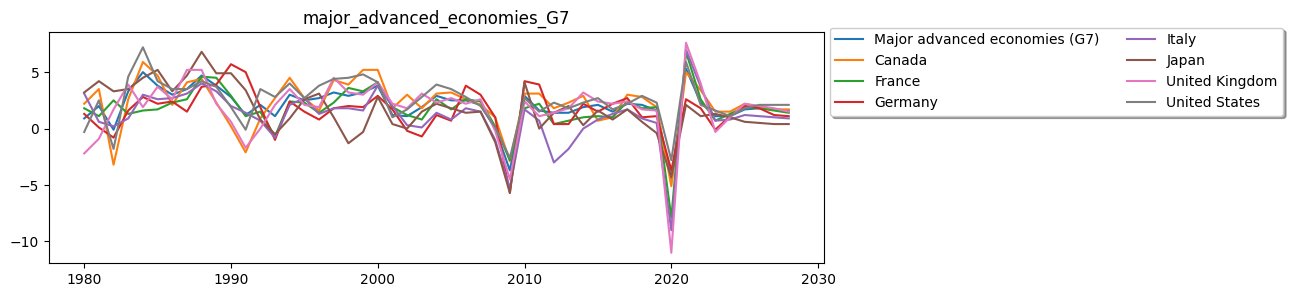

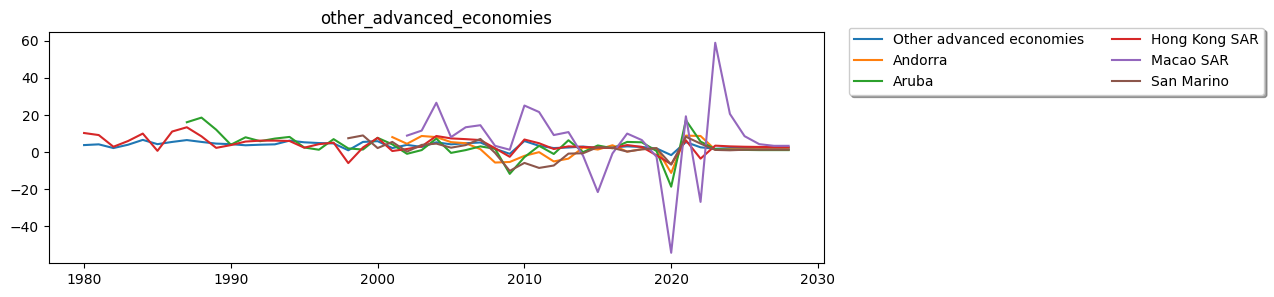

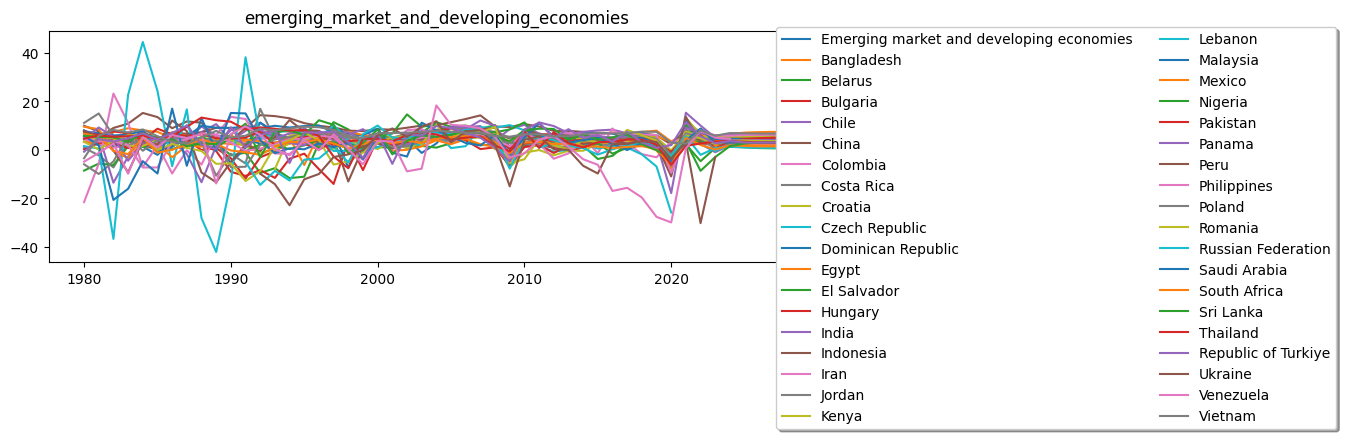

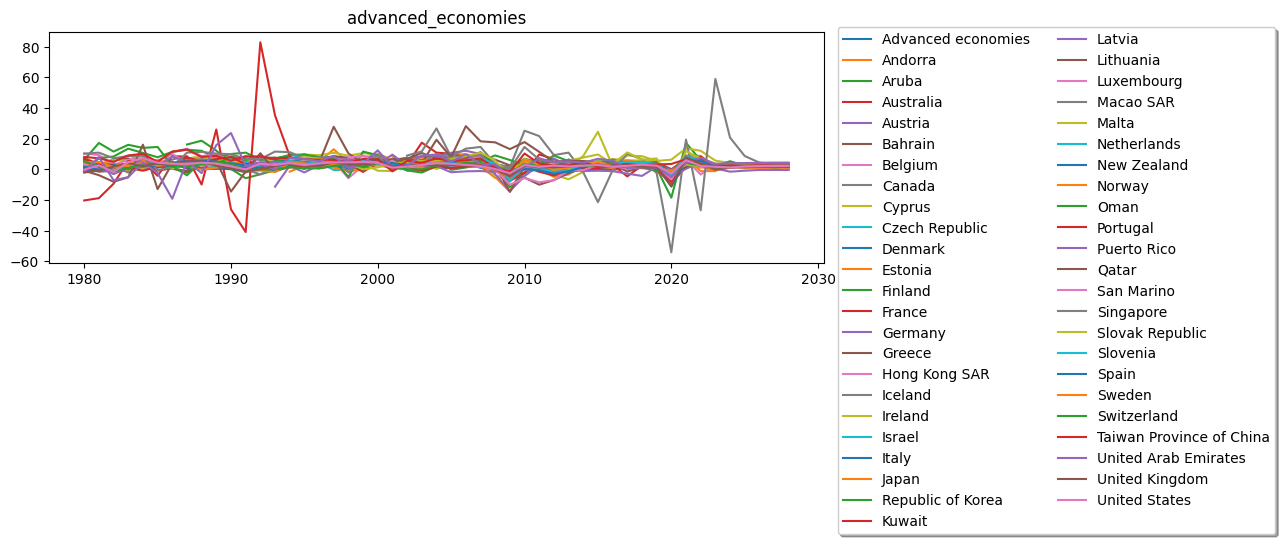

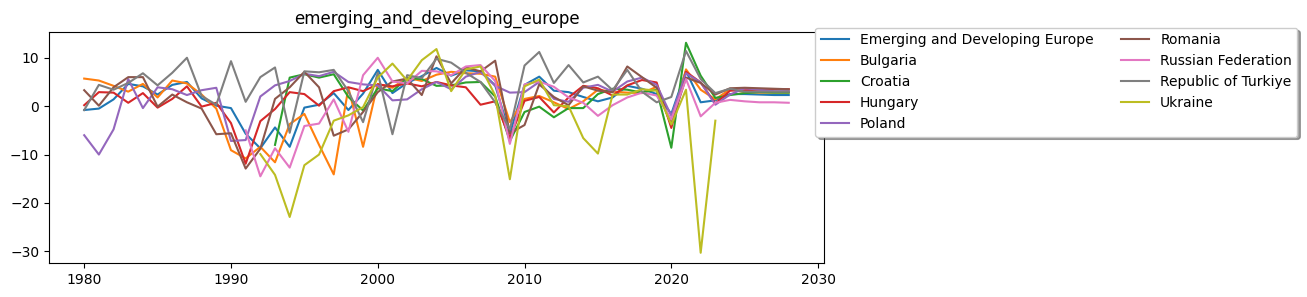

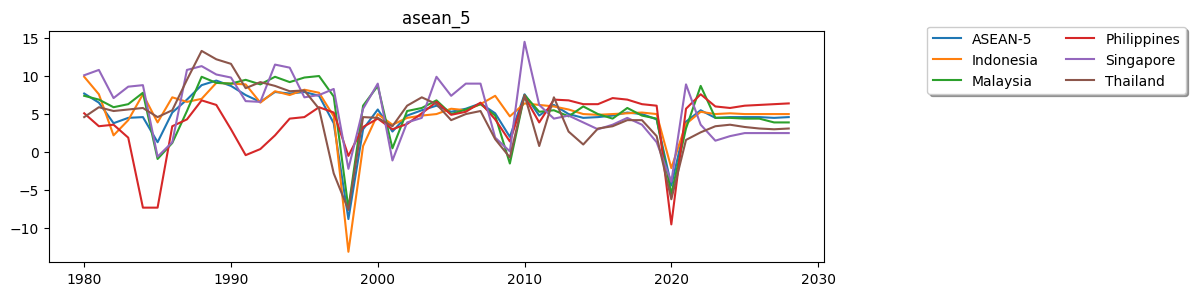

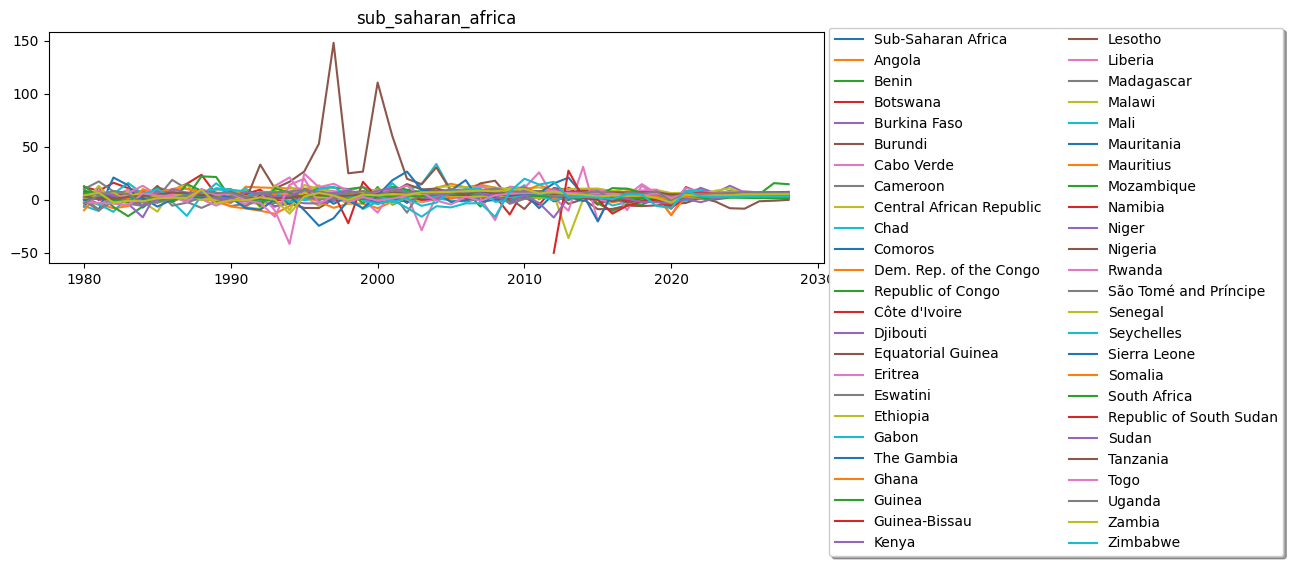

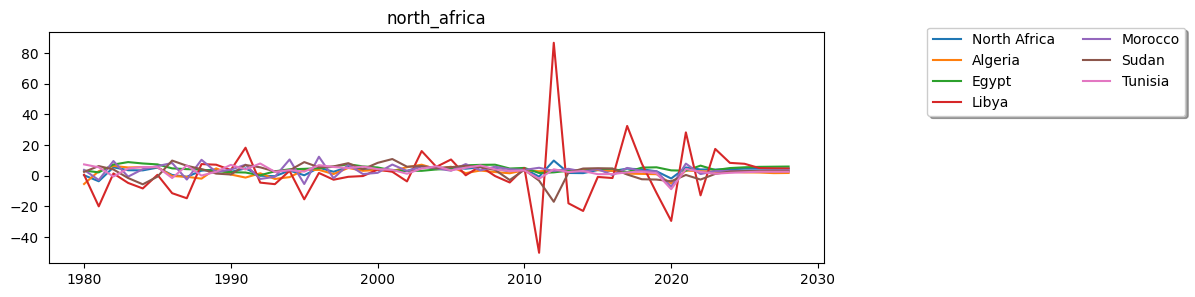

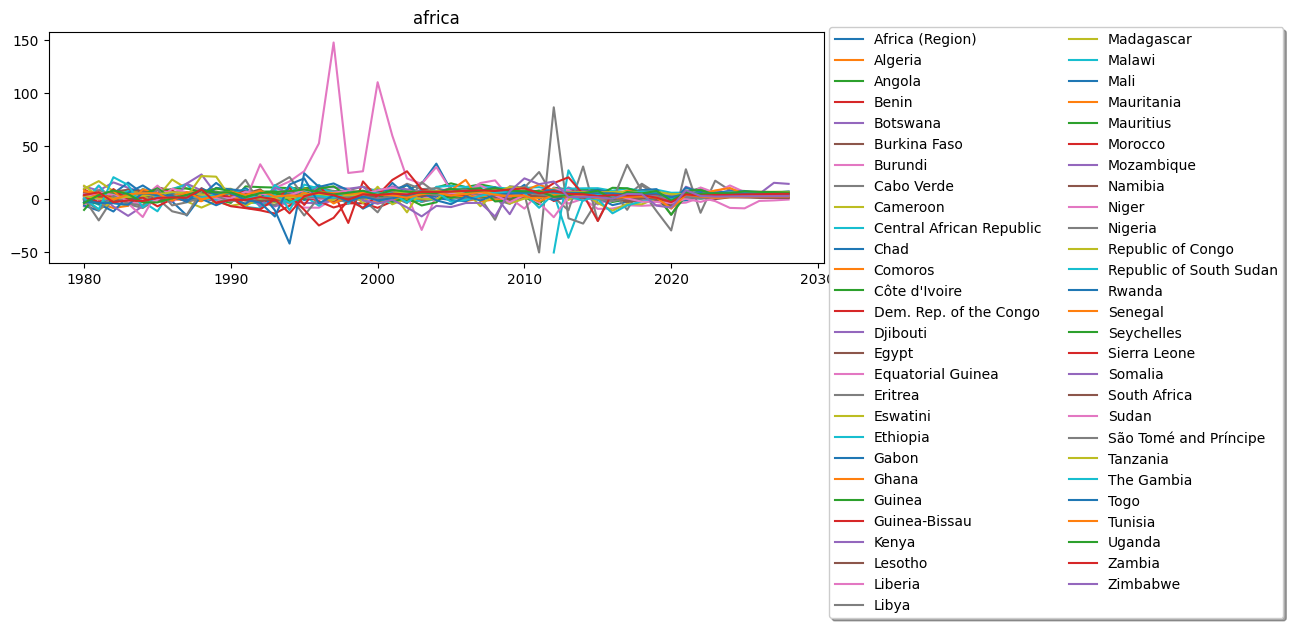

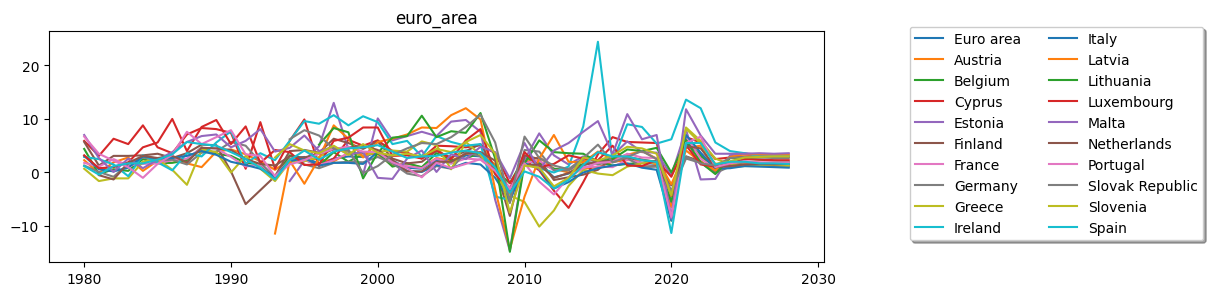

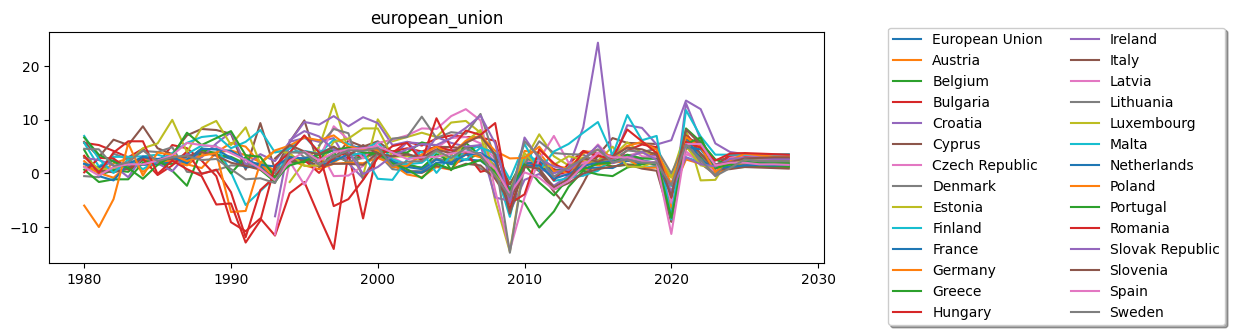

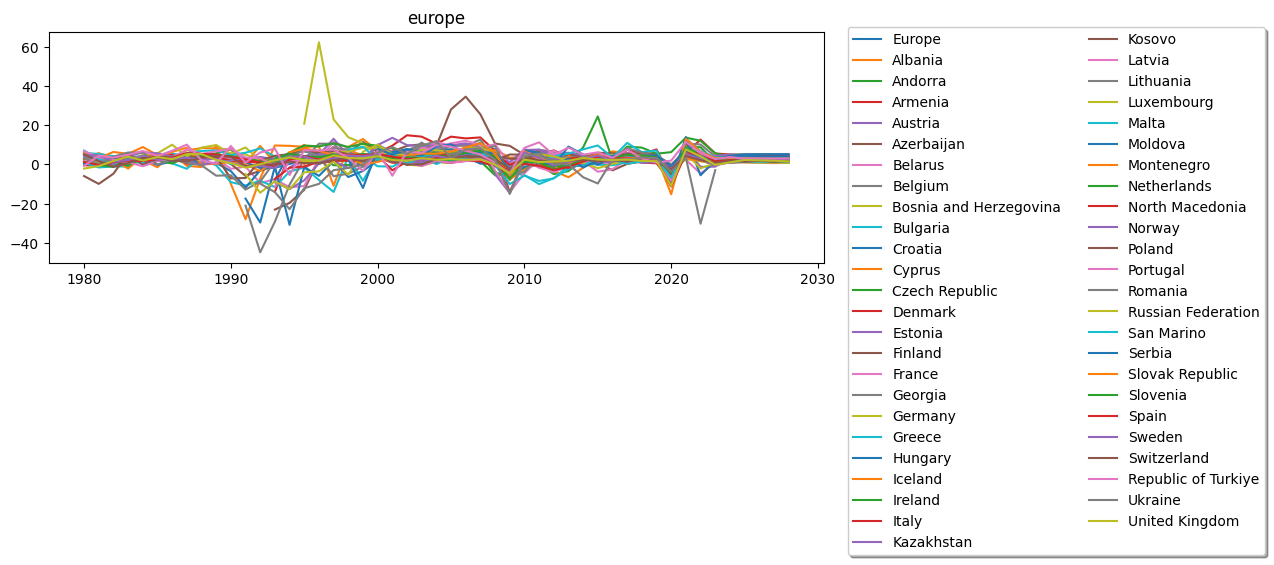

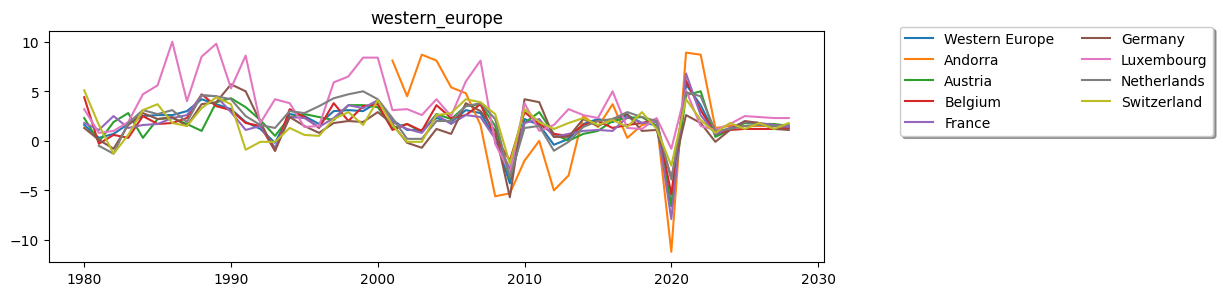

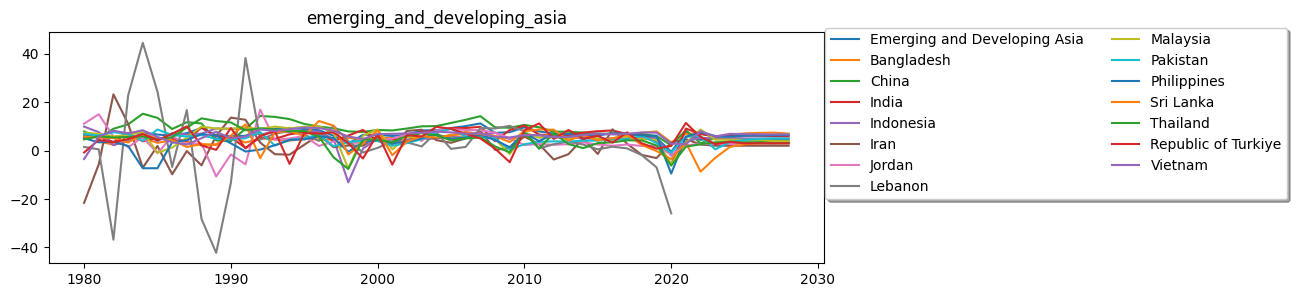

In [32]:
# Criado diversos dicionários para plotagem, optou-se por escolher o que abrange mais informações mundiais.
# Caso deseje verificar outras plotagens indicar no local de dict_list
plot_graph(df_transpose,dict_list)


##  3 Validando os dados tratados.

Criando dois Dataframes
Um com os dados pivotados para tratativa
e outro com dados dos países/regiões.

In [33]:
df_transpose.to_csv('df_eda.csv', index = False)

In [34]:
df_final_transpose = df_transpose.set_index('Year').transpose().reset_index(names=['Real GDP growth (Annual percent change)']).rename_axis('', axis=1)
df_final_transpose

countries_missing_predictions = df_final_transpose['Real GDP growth (Annual percent change)']

## 4 Feature Engeneering - Escolhendo o melhor modelo

Entendendo como funciona o arquivo gerado ao final da Etapa de EDA.
Descrição estatística, lista randômica de dados e plotagem para entender como se comportam os diversos dados.

### 4.1 Entendendo os dados  

In [35]:
df_original = pd.read_csv("df_eda.csv",index_col='Year', parse_dates=True)
df_original.index.name = None
df_original

Afghanistan  Albania  Algeria  Andorra  Angola  \
1980-01-01          NaN      2.7     -5.4      NaN     2.4   
1981-01-01          NaN      5.7      3.0      NaN    -4.4   
1982-01-01          NaN      2.9      6.4      NaN     0.0   
1983-01-01          NaN      1.1      5.4      NaN     4.2   
1984-01-01          NaN      2.0      5.6      NaN     6.0   
1985-01-01          NaN     -1.5      5.6      NaN     3.5   
1986-01-01          NaN      5.6     -0.2      NaN     2.9   
1987-01-01          NaN     -0.8     -0.7      NaN     4.1   
1988-01-01          NaN     -1.4     -1.9      NaN     6.1   
1989-01-01          NaN      9.8      4.8      NaN     0.0   
1990-01-01          NaN    -10.0      0.8      NaN    -3.5   
1991-01-01          NaN    -28.0     -1.2      NaN    12.1   
1992-01-01          NaN     -7.2      1.6      NaN    11.4   
1993-01-01          NaN      9.6     -2.1      NaN    11.0   
1994-01-01          NaN      9.4     -0.9      NaN    10.5   
1995-01-01          NaN      8.9      3.8      NaN    10.4   
1996-01-01          NaN      9.1      3.8      NaN    11.2   
1997-01-01          NaN    -10.9      1.1      NaN     7.3   
1998-01-01          NaN      8.8      5.1      NaN     4.7   
1999-01-01          NaN     12.9      3.2      NaN     2.2   
2000-01-01          NaN      6.9      3.8      NaN     3.1   
2001-01-01          NaN      8.3      3.0      8.1     4.2   
2002-01-01          NaN      4.5      5.6      4.5    13.7   
2003-01-01          8.7      5.5      7.2      8.7     3.0   
2004-01-01          0.7      5.5      4.3      8.1    11.0   
2005-01-01         11.8      5.5      5.9      5.4    15.0   
2006-01-01          5.4      5.9      1.7      4.8    11.5   
2007-01-01         13.3      6.0      3.4      1.6    14.0   
2008-01-01          3.9      7.5      2.4     -5.6    11.2   
2009-01-01         20.6      3.4      1.6     -5.3     0.9   
2010-01-01          8.4      3.7      3.6     -2.0     4.9   
2011-01-01          6.5      2.5      2.9      0.0     3.5   
2012-01-01         14.0      1.4      3.4     -5.0     8.5   
2013-01-01          5.7      1.0      2.8     -3.5     5.0   
2014-01-01          2.7      1.8      3.8      2.5     4.8   
2015-01-01          1.0      2.2      3.7      1.4     0.9   
2016-01-01          2.2      3.3      3.2      3.7    -2.6   
2017-01-01          2.6      3.8      1.4      0.3    -0.2   
2018-01-01          1.2      4.0      1.2      1.6    -1.3   
2019-01-01          3.9      2.1      1.0      2.0    -0.7   
2020-01-01         -2.4     -3.5     -5.1    -11.2    -5.6   
2021-01-01          NaN      8.5      3.4      8.9     1.1   
2022-01-01          NaN      3.7      2.9      8.7     2.8   
2023-01-01          NaN      2.2      2.6      1.3     3.5   
2024-01-01          NaN      3.3      2.6      1.5     3.7   
2025-01-01          NaN      3.4      2.2      1.5     4.0   
2026-01-01          NaN      3.4      2.1      1.5     4.1   
2027-01-01          NaN      3.4      1.7      1.5     4.2   
2028-01-01          NaN      3.4      1.8      1.5     4.2   

            Antigua and Barbuda  Argentina  Armenia  Aruba  Australia  \
1980-01-01                  8.2        0.7      NaN    NaN        2.9   
1981-01-01                  3.8       -5.7      NaN    NaN        4.1   
1982-01-01                 -0.1       -3.1      NaN    NaN        0.1   
1983-01-01                  5.4        3.7      NaN    NaN       -0.5   
1984-01-01                 10.2        2.0      NaN    NaN        6.3   
1985-01-01                  7.6       -7.0      NaN    NaN        5.5   
1986-01-01                 11.5        7.1      NaN    NaN        2.4   
1987-01-01                  6.6        2.5      NaN   16.1        4.9   
1988-01-01                  5.2       -2.0      NaN   18.6        4.3   
1989-01-01                  5.3       -7.0      NaN   12.1        4.6   
1990-01-01                  3.0       -1.3      NaN    4.0        1.5   
1991-01-01                  2.2    

In [36]:
df_original.iloc[:-5,:].describe().round()

Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
count         18.0     44.0     44.0     23.0    44.0                 44.0   
mean           6.0      3.0      2.0      2.0     5.0                  3.0   
std            6.0      7.0      3.0      5.0     5.0                  6.0   
min           -2.0    -28.0     -5.0    -11.0    -6.0                -20.0   
25%            2.0      2.0      1.0     -1.0     1.0                  2.0   
50%            5.0      4.0      3.0      2.0     4.0                  5.0   
75%            9.0      6.0      4.0      5.0    10.0                  6.0   
max           21.0     13.0      7.0      9.0    15.0                 13.0   

       Argentina  Armenia  Aruba  Australia  Austria  Azerbaijan  The Bahamas  \
count       44.0     31.0   37.0       44.0     44.0        31.0         44.0   
mean         2.0      5.0    4.0        3.0      2.0         5.0          2.0   
std          6.0      7.0    7.0        2.0      2.0        12.0          5.0   
min        -11.0    -14.0  -19.0       -2.0     -6.0       -23.0        -24.0   
25%         -3.0      3.0    1.0        2.0      1.0         1.0          1.0   
50%          2.0      6.0    3.0        3.0      2.0         5.0          2.0   
75%          6.0      9.0    7.0        4.0      3.0         9.0          4.0   
max         10.0     15.0   19.0        6.0      5.0        34.0         14.0   

       Bahrain  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  Bhutan  \
count     44.0        43.0      44.0     42.0     44.0    44.0   44.0    44.0   
mean       4.0         5.0       1.0      2.0      2.0     5.0    4.0     7.0   
std        3.0         1.0       4.0      6.0      2.0     6.0    3.0     4.0   
min       -5.0         2.0     -13.0    -12.0     -5.0   -13.0   -3.0    -3.0   
25%        2.0         4.0      -1.0      0.0      1.0     1.0    3.0     5.0   
50%        4.0         5.0       1.0      3.0      2.0     4.0    4.0     6.0   
75%        6.0         6.0       4.0      5.0      3.0     9.0    6.0     8.0   
max        8.0         8.0      10.0     11.0      6.0    22.0    9.0    20.0   

       Bolivia  Bosnia and Herzegovina  Botswana  Brazil  Brunei Darussalam  \
count     44.0                    29.0      44.0    44.0               38.0   
mean       3.0                     7.0       6.0     2.0                1.0   
std        3.0                    12.0       6.0     3.0                2.0   
min       -9.0                    -3.0     -14.0    -4.0               -3.0   
25%        2.0                     2.0       3.0     0.0               -1.0   
50%        4.0                     4.0       6.0     3.0                1.0   
75%        5.0                     6.0       8.0     4.0                3.0   
max        7.0                    62.0      23.0     9.0                5.0   

       Bulgaria  Burkina Faso  Burundi  Cabo Verde  Cambodia  Cameroon  \
count      44.0          44.0     44.0        44.0      36.0      44.0   
mean        1.0           5.0      2.0         5.0       7.0       3.0   
std         6.0           3.0      4.0         4.0       3.0       4.0   
min       -14.0          -1.0     -8.0       -15.0      -3.0      -8.0   
25%        -1.0           3.0      0.0         3.0       6.0       3.0   
50%         3.0           6.0      3.0         6.0       7.0       4.0   
75%         5.0           7.0      4.0         8.0       8.0       5.0   
max         8.0          11.0     12.0        15.0      13.0      17.0   

       Canada  Central African Republic  Chad  Chile  China  Colombia  \
count    44.0                      44.0  44.0   44.0   44.0      44.0   
mean      2.0                       1.0   4.0    4.0    9.0       3.0   
std       2.0                       7.0   7.0    4.0    3.0       3.0   
min      -5.0                     -36.0 -11.0  -14.0    2.0      -7.0   
25%       2.0                      -0.0   0.0    2.0    7.0       2.0   
50%       3.0              

In [37]:
df_original.describe().T

count      mean       std   min    25%   50%  \
Afghanistan                     18.0  6.122222  5.790312  -2.4  2.300  4.65   
Albania                         49.0  2.883673  6.490742 -28.0  2.000  3.40   
Algeria                         49.0  2.406122  2.629275  -5.4  1.400  2.90   
Andorra                         28.0  1.660714  4.819816 -11.2  0.225  1.50   
Angola                          49.0  4.785714  4.979332  -5.6  2.200  4.10   
...                              ...       ...       ...   ...    ...   ...   
Major advanced economies (G7)   49.0  2.034694  1.712156  -4.5  1.400  2.10   
Middle East and Central Asia    49.0  3.393878  2.610668  -2.7  1.700  3.40   
Other advanced economies        49.0  3.583673  1.769339  -1.6  2.300  3.80   
Sub-Saharan Africa              38.0  3.892105  1.911188  -1.7  3.200  4.15   
World                           49.0  3.334694  1.476278  -2.8  2.800  3.40   

                                 75%   max  
Afghanistan                    8.625  20.6  
Albania                        5.900  12.9  
Algeria                        3.800   7.2  
Andorra                        4.575   8.9  
Angola                         8.500  15.0  
...                              ...   ...  
Major advanced economies (G7)  2.900   5.3  
Middle East and Central Asia   4.900  10.2  
Other advanced economies       4.900   6.6  
Sub-Saharan Africa             4.875   6.9  
World                          3.900   6.3  

[228 rows x 8 columns]

Criado uma função para que os dados apresentados acima fique de maneira mais elegante e compreensível

In [38]:
# Create a function to describe basic properties of the dataset.

def check_df(dataframe, max_columns=15):
    print(" MEMORY USAGE ".center(70, '-'))
    print('{:.2f} MB'.format(dataframe.memory_usage().sum() / 1024**2))
    print(" MAIN INFO ".center(70,'-'))
    df_info = pd.DataFrame(dataframe.iloc[:, :max_columns].dtypes, columns=['TYPES'])
    df_info["MISSING VALUES"] = dataframe.iloc[:, :max_columns].isnull().sum()
    df_info["UNIQUE"] = dataframe.iloc[:, :max_columns].nunique()
    print(df_info)
    print(" BASIC STATISTICS ".center(70,'-'))
    print(dataframe.describe().round(2))

In [39]:
check_df(df_original)

---------------------------- MEMORY USAGE ----------------------------
0.09 MB
----------------------------- MAIN INFO ------------------------------
                       TYPES  MISSING VALUES  UNIQUE
Afghanistan          float64              31      17
Albania              float64               0      40
Algeria              float64               0      36
Andorra              float64              21      21
Angola               float64               0      39
Antigua and Barbuda  float64               0      39
Argentina            float64               0      40
Armenia              float64              13      29
Aruba                float64               7      36
Australia            float64               0      33
Austria              float64               0      32
Azerbaijan           float64              13      30
The Bahamas          float64               0      36
Bahrain              float64               0      36
Bangladesh           float64               1      33
--


### 4.2 Criando uma Random List e Plotando Gráficos

In [40]:
random_list = [1, 8, 23, 33, 55, 86, 92, 100, 150, 214]
random_list_columns = df_original.iloc[:1,random_list].columns
random_list_columns

Index(['Albania', 'Aruba', 'Botswana', 'Central African Republic', 'Estonia',
       'Jordan', 'Kuwait', 'Lithuania', 'Saudi Arabia',
       'Western Hemisphere (Region)'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

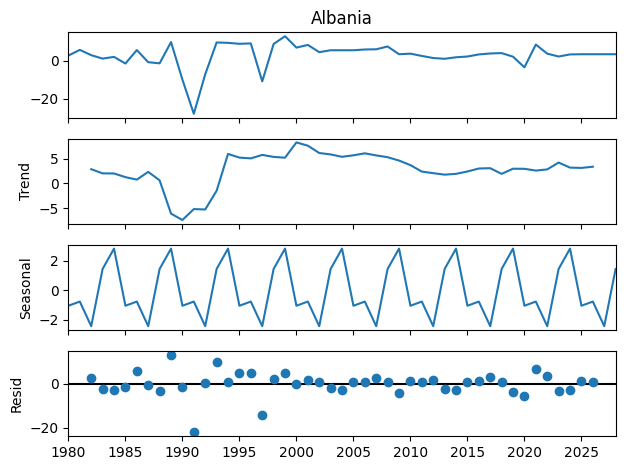

<Figure size 800x600 with 0 Axes>

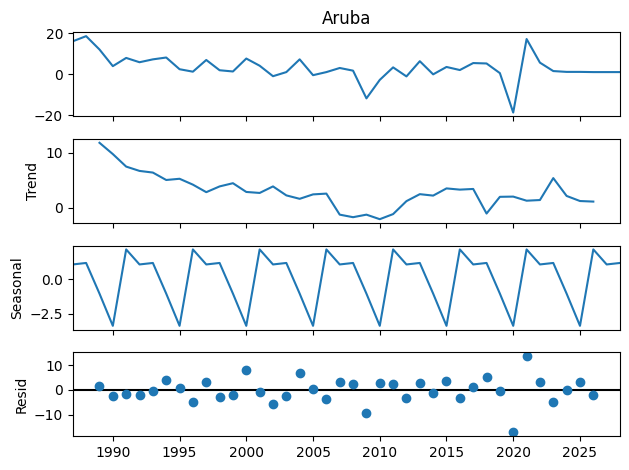

<Figure size 800x600 with 0 Axes>

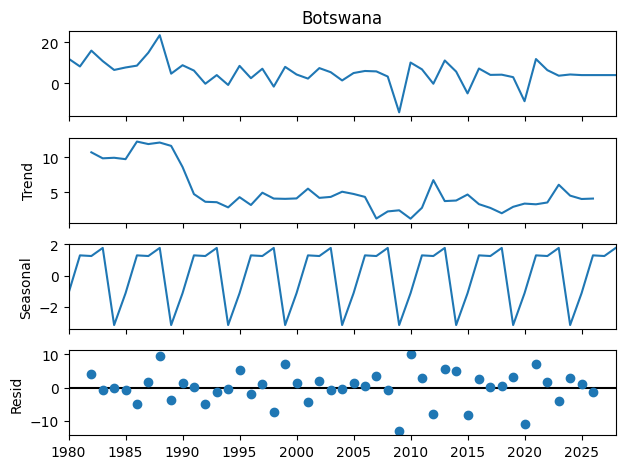

<Figure size 800x600 with 0 Axes>

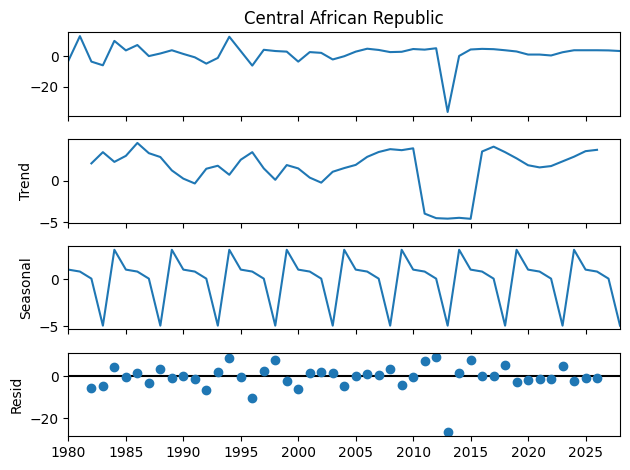

<Figure size 800x600 with 0 Axes>

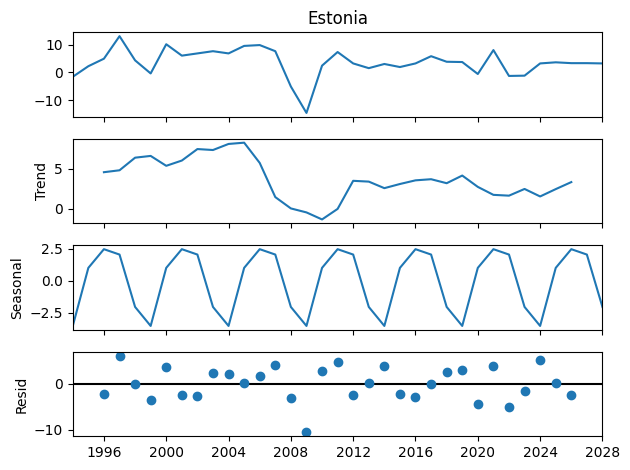

<Figure size 800x600 with 0 Axes>

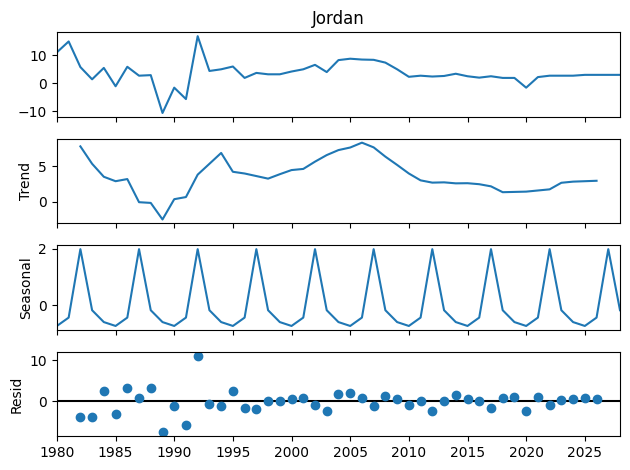

<Figure size 800x600 with 0 Axes>

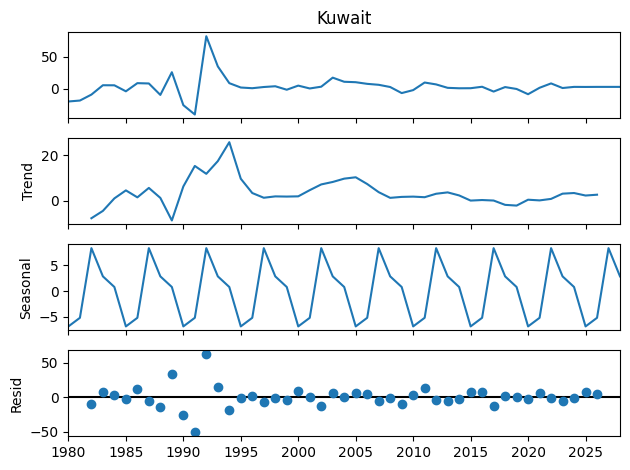

<Figure size 800x600 with 0 Axes>

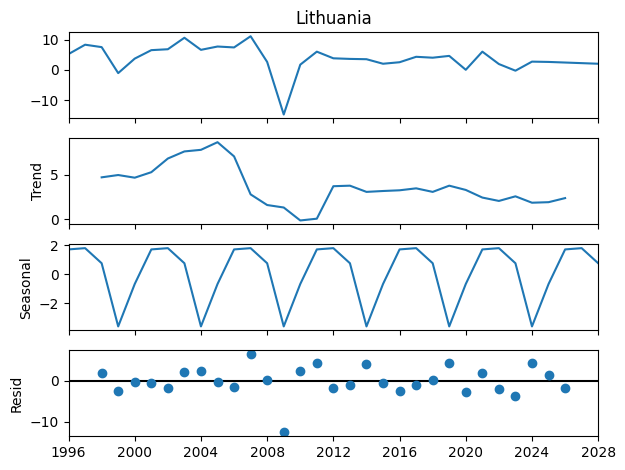

<Figure size 800x600 with 0 Axes>

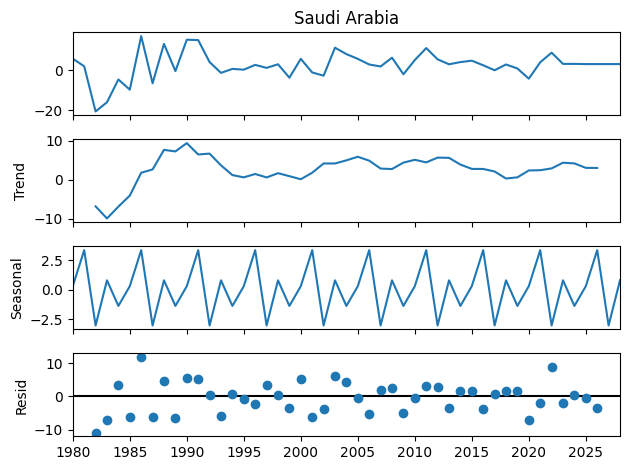

<Figure size 800x600 with 0 Axes>

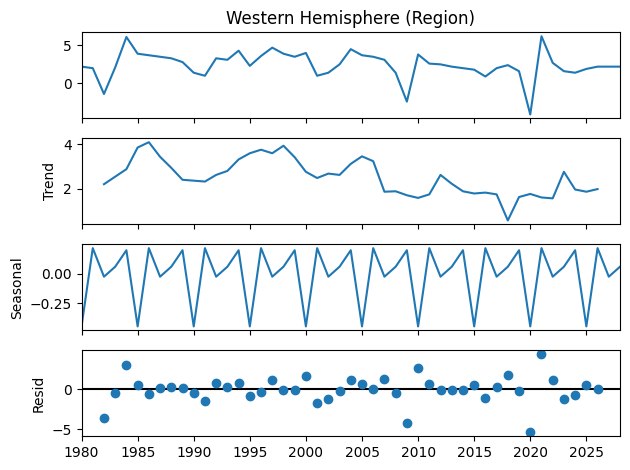

In [41]:
def safe_seasonal_decompose(df, list_columns, period=5):
    for column in list_columns:
        # Drop rows with missing values for the specific column
        column_data = df[column].dropna()

        if not column_data.empty:
            resultado = seasonal_decompose(column_data, period=period)
            fig = plt.figure(figsize=(8, 6))
            fig = resultado.plot()

# Chame a função safe_seasonal_decompose para lidar com valores ausentes
safe_seasonal_decompose(df_original, random_list_columns)

A função realiza a decomposição sazonal de séries temporais, removendo os valores nulos. A decomposição sazonal é uma técnica que divide uma série temporal em três componentes principais: tendência, sazonalidade e ruído.

A decomposição sazonal separa a série em três componentes:

*   Tendência: Representa a tendência subjacente da série temporal.
*   Sazonalidade: Representa os padrões repetitivos ao longo do tempo, como sazonalidade anual, mensal, etc.
*   Resíduo (ou ruído): Representa o erro residual após a remoção da tendência e sazonalidade.

## 5 Executando o projeto - Criando predições



### 5.1 Treino e teste

#### 5.1.1 Treino e teste com um país

Selecionado uma amostra para testar os modelo de testes.

Nesse caso, optou-se por escolher, o Brasil, país natal de quem criou este projeto.

In [42]:
# Convert to a dataframe format compatible with StatsForecast package.
br = df_original['Brazil'].reset_index()
br.columns= ['ds', 'y']
br['unique_id'] = 'BR'

# Split into train and test dataset
train_br = br[br['ds'] <= '2023-01-01']
test_br = br[br['ds'] > '2023-01-01']




Antes de fazer as previsões para todos os países, os modelos foram testados para o Brazil.

In [43]:
# Convert to a dataframe format compatible with StatsForecast package.
br = df_original['Brazil'].reset_index()
br.columns= ['ds', 'y']
br['unique_id'] = 'BR'

# Split into train and test dataset
train_br = br[br['ds'] <= '2023-01-01']
test_br = br[br['ds'] > '2023-01-01']



In [44]:
train_br

ds    y unique_id
0  1980-01-01  9.2        BR
1  1981-01-01 -4.4        BR
2  1982-01-01  0.6        BR
3  1983-01-01 -3.4        BR
4  1984-01-01  5.3        BR
5  1985-01-01  7.9        BR
6  1986-01-01  7.5        BR
7  1987-01-01  3.6        BR
8  1988-01-01  0.3        BR
9  1989-01-01  3.2        BR
10 1990-01-01 -4.2        BR
11 1991-01-01  1.0        BR
12 1992-01-01 -0.5        BR
13 1993-01-01  4.7        BR
14 1994-01-01  5.3        BR
15 1995-01-01  4.4        BR
16 1996-01-01  2.2        BR
17 1997-01-01  3.4        BR
18 1998-01-01  0.3        BR
19 1999-01-01  0.5        BR
20 2000-01-01  4.4        BR
21 2001-01-01  1.4        BR
22 2002-01-01  3.1        BR
23 2003-01-01  1.1        BR
24 2004-01-01  5.8        BR
25 2005-01-01  3.2        BR
26 2006-01-01  4.0        BR
27 2007-01-01  6.1        BR
28 2008-01-01  5.1        BR
29 2009-01-01 -0.1        BR
30 2010-01-01  7.5        BR
31 2011-01-01  4.0        BR
32 2012-01-01  1.9        BR
33 2013-01-01  3.0        BR
34 2014-01-01  0.5        BR
35 2015-01-01 -3.5        BR
36 2016-01-01 -3.3        BR
37 2017-01-01  1.3        BR
38 2018-01-01  1.8        BR
39 2019-01-01  1.2        BR
40 2020-01-01 -3.3        BR
41 2021-01-01  5.0        BR
42 2022-01-01  2.9        BR
43 2023-01-01  0.9        BR

In [45]:
# Check for stationarity
br_stationary = adfuller(train_br['y'], autolag = 'AIC')

print('1. ADF : ', br_stationary [0].round(2))
print('2. P-Value: ', br_stationary [1].round(2))
print('3. Num of Lags: ', br_stationary [2])
print('4. Num of Observations used for ADF Regression and Critical Calculation : ', br_stationary [3])
print('5. Critical Values : ')
for key, val in br_stationary[4].items():
    print('\t', key , ' : ', val.round(2))

1. ADF :  -5.95
2. P-Value:  0.0
3. Num of Lags:  0
4. Num of Observations used for ADF Regression and Critical Calculation :  43
5. Critical Values : 
	 1%  :  -3.59
	 5%  :  -2.93
	 10%  :  -2.6


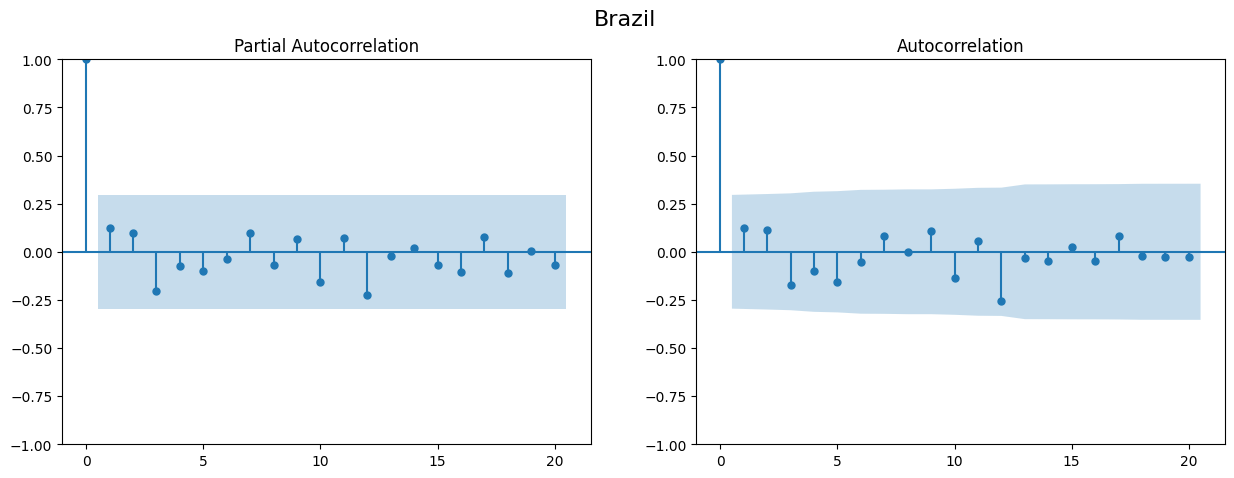

In [46]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
pacf = plot_pacf(train_br['y'], lags=20, ax=ax[0])
acf = plot_acf(train_br['y'], lags=20, ax=ax[1])
fig.suptitle('Brazil', fontsize=16)
plt.show()

#### 5.1.2 Modelos

Foi utilizado o pacote StatsForecast, que fornece diversos modelos para previsão de séries temporais com diferentes propriedades.
Os modelos utilizados neste projeto foram:

1.  AutoARIMA.
2.  AutoETS.
1.  AutoCES.
2.  AutoTheta.


A escolha de qual modelo utilizar depende das características dos dados e do objetivo da previsão.

*   AutoARIMA ou AutoTheta são adequados para dados sem tendência ou sazonalidade,
*   AutoETS ou AutoCES podem ser aplicados para dados com tendência não linear ou sazonalidade,
*   AutoARIMA ou AutoETS podem ser usados ​para dados com tendência linear ou sazonalidade.   

Dentre as métricas disponíveis para avaliar a previsão de séries temporais, foi escolhido o Erro Médio Absoluto (MAE).

*   Erro Médio Absoluto (MAE): Mede a diferença absoluta média entre os valores previstos e reais durante um determinado período de tempo. As limitações desta métrica incluem que ela não leva em conta a direção dos erros e pode não refletir a importância relativa de erros maiores em relação a erros menores.

In [47]:
models = [
    AutoARIMA(),
    AutoETS(),
    AutoCES(),
    AutoTheta()
]

In [48]:
sf = StatsForecast(
    df=train_br,
    models = models,
    freq='YS',
    n_jobs=-1
)

In [49]:
forecasts_df = sf.forecast(h=5)
result = pd.merge(test_br, forecasts_df, left_on='ds', right_on='ds')
result

ds    y unique_id  AutoARIMA   AutoETS       CES  AutoTheta
0 2024-01-01  1.5        BR   2.183486  2.294867  1.205588   1.655643
1 2025-01-01  1.9        BR   2.183483  2.294867  1.185954   1.655643
2 2026-01-01  2.0        BR   2.183480  2.294867  1.162289   1.655643
3 2027-01-01  2.0        BR   2.183477  2.294867  1.138551   1.655643
4 2028-01-01  2.0        BR   2.183475  2.294867  1.115229   1.655643

**Função para checar qual melhor modelo a ser utilizado:**


In [50]:
def check_metrics(df, metric):
    models = df.drop(columns=['ds', 'y', 'unique_id']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.apply(lambda x: metric(x['y'], x[model]), axis=1).to_frame() # Calculate loss for every unique_id and model.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.mean(numeric_only=True, axis=0) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    return evals.sort_values()

In [51]:
ar_metrics = check_metrics(result, mae)
ar_metrics #.index[0]

AutoTheta    0.286614
AutoARIMA    0.303480
AutoETS      0.414867
CES          0.718478
dtype: float64

Considerando que a série temporal armênia é estacionária, é mais adequado  a aplicação dos modelos AutoARIMA e AutoTheta.
Como resultado, AutoTheta e AutoARIMA forneceram as melhores pontuações métricas, embora outros modelos também tenham sido testados para esta série temporal.

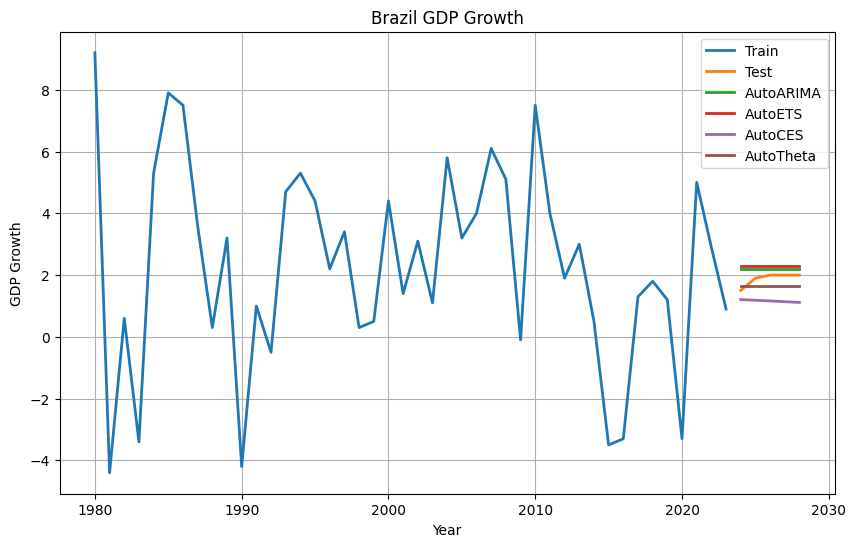

In [52]:
# Create a new figure and axis for the Matplotlib plot
plt.figure(figsize=(10, 6))

# Plot the GDP Growth values using Matplotlib
plt.plot(train_br['ds'], train_br['y'], label='Train', linewidth=2)
plt.plot(test_br['ds'], test_br['y'], label='Test', linewidth=2)
plt.plot(forecasts_df['ds'], forecasts_df['AutoARIMA'], label='AutoARIMA', linewidth=2)
plt.plot(forecasts_df['ds'], forecasts_df['AutoETS'], label='AutoETS', linewidth=2)
plt.plot(forecasts_df['ds'], forecasts_df['CES'], label='AutoCES', linewidth=2)
plt.plot(forecasts_df['ds'], forecasts_df['AutoTheta'], label='AutoTheta', linewidth=2)

# Customize the plot
plt.title('Brazil GDP Growth')
plt.xlabel('Year')
plt.ylabel('GDP Growth')
plt.legend()
plt.grid(True)

# Show the Matplotlib plot
plt.show()


### 5.2 Predição para todos os países


#### 5.2.1 Função para os outros países

In [53]:
# Test Stationarity for all countries.

def test_stationarity(df:pd.DataFrame):
    stationary_series = []
    non_stationary_series = []
    for column in df.columns:
        country_df = df[[column]].dropna()
        adf = adfuller(country_df)

        if adf[1]>= 0.05:
            non_stationary_series.append(column)
        else:
            stationary_series.append(column)
    return stationary_series, non_stationary_series

In [54]:
stationary_series, non_stationary_series = test_stationarity(df_original)

print(len(stationary_series), 'stationary_series')
print(len(non_stationary_series), 'non_stationary_series')

186 stationary_series
42 non_stationary_series


#### 5.2.2 Treino de modelo para outros países

In [55]:
train = df_original.copy().iloc[:44]
test = df_original.copy().iloc[44:]

In [56]:
def train_models(df:pd.DataFrame, model):

    autoarima_df = pd.DataFrame()
    autoets_df = pd.DataFrame()
    autoces_df = pd.DataFrame()
    autotheta_df = pd.DataFrame()

    for column in df.columns:

        country_df = df[[column]].dropna().reset_index()
        country_df.columns= ['ds', 'y']
        country_df['unique_id'] = 'A'

        # Set the number of predictions required to reach 2028.
        n_pred = test.index.year[-1] - country_df['ds'].max().year
        sf = StatsForecast(
            df= country_df,
            models = models,
            freq='YS',
            n_jobs=-1
            )
        model_result = sf.forecast(h=n_pred).set_index('ds')

        autoarima_df[column] = model_result['AutoARIMA']
        autoets_df[column] = model_result['AutoETS']
        autoces_df[column] = model_result['CES']
        autotheta_df[column] = model_result['AutoTheta']

    return autoarima_df, autoets_df, autoces_df, autotheta_df

In [57]:
models = [
    AutoARIMA(),
    AutoETS(),
    AutoCES(),
    AutoTheta()
]

In [58]:
autoarima_df, autoets_df, autoces_df, autotheta_df = train_models(train, models)

In [59]:
autoarima_df

Afghanistan   Albania   Algeria   Andorra    Angola  \
ds                                                                
2021-01-01     2.312866       NaN       NaN       NaN       NaN   
2022-01-01    -1.212707       NaN       NaN       NaN       NaN   
2023-01-01     1.424683       NaN       NaN       NaN       NaN   
2024-01-01    -0.548280  2.359156  1.667565 -0.031671  2.313029   
2025-01-01     0.927643  0.000000  1.069528  0.000000  2.064866   
2026-01-01    -0.176457  0.000000  0.685964  0.000000  1.843328   
2027-01-01     0.649491  0.000000  0.439958  0.000000  1.645558   
2028-01-01     0.031621  0.000000  0.282176  0.000000  1.469007   

            Antigua and Barbuda  Argentina   Armenia    Aruba  Australia  \
ds                                                                         
2021-01-01                  NaN        NaN       NaN      NaN        NaN   
2022-01-01                  NaN        NaN       NaN      NaN        NaN   
2023-01-01                  NaN        NaN       NaN      NaN        NaN   
2024-01-01             2.289777   0.050215  3.323336  2.79934   2.769178   
2025-01-01             0.953287   0.012608  2.008102  2.79934   2.767715   
2026-01-01             0.396875   0.003165  1.213381  2.79934   2.766254   
2027-01-01             0.165228   0.000795  0.733177  2.79934   2.764794   
2028-01-01             0.068788   0.000200  0.443017  2.79934   2.763334   

             Austria  Azerbaijan  The Bahamas   Bahrain  Bangladesh  Barbados  \
ds                                                                              
2021-01-01       NaN         NaN          NaN       NaN         NaN       NaN   
2022-01-01       NaN         NaN          NaN       NaN         NaN       NaN   
2023-01-01       NaN         NaN          NaN       NaN         NaN       NaN   
2024-01-01  1.611960    2.563241          0.0  2.272208    6.251007   0.70711   
2025-01-01  1.609734    1.993463          0.0  2.230501    6.251007   0.00000   
2026-01-01  1.607510    1.550339          0.0  2.189559    6.251007   0.00000   
2027-01-01  1.605290    1.205717          0.0  2.149368    6.251007   0.00000   
2028-01-01  1.603073    0.937700          0.0  2.109915    6.251007   0.00000   

             Belarus   Belgium    Belize     Benin    Bhutan   Bolivia  \
ds                                                                       
2021-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2022-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2024-01-01  0.504821  3.199024  4.009767  5.673023  2.053803  2.085397   
2025-01-01  0.364064  1.851845  3.657763  5.720139  2.907906  2.085397   
2026-01-01  0.262553  1.267520  3.336661  5.720139  3.230416  2.085397   
2027-01-01  0.189346  1.862087  3.043746  5.720139  2.153208  2.085397   
2028-01-01  0.136552  1.289344  2.776546  5.720139  2.217027  2.085397   

            Bosnia and Herzegovina  Botswana    Brazil  Brunei Darussalam  \
ds                                                                          
2021-01-01                     NaN       NaN       NaN                NaN   
2022-01-01                     NaN       NaN       NaN                NaN   
2023-01-01                     NaN       NaN       NaN                NaN   
2024-01-01                2.915102  3.795845  2.183486           1.661051   
2025-01-01                2.915102  3.795845  2.183483           0.000000   
2026-01-01                2.915102  3.795845  2.183480           0.000000   
2027-01-01                2.915102  3.795845  2.183477           0.000000   
2028-01-01                2.915102  3.795845  2.183475           0.000000   

            Bulgaria  Burkina Faso   Burundi  Cabo Verde  Cambodia  Cameroon  \
ds                                                                             
2021-01-01       NaN           NaN       NaN         NaN       NaN       NaN   
2022-01-01       

In [60]:
autoets_df

Afghanistan   Albania   Algeria   Andorra    Angola  \
ds                                                                
2021-01-01     1.749213       NaN       NaN       NaN       NaN   
2022-01-01     1.749213       NaN       NaN       NaN       NaN   
2023-01-01     1.749213       NaN       NaN       NaN       NaN   
2024-01-01     1.749213  2.823993  2.441543  2.935599  2.352625   
2025-01-01     1.749213  2.823993  2.441543  2.935599  2.352625   
2026-01-01     1.749213  2.823993  2.441543  2.935599  2.352625   
2027-01-01     1.749213  2.823993  2.441543  2.935599  2.352625   
2028-01-01     1.749213  2.823993  2.441543  2.935599  2.352625   

            Antigua and Barbuda  Argentina  Armenia     Aruba  Australia  \
ds                                                                         
2021-01-01                  NaN        NaN      NaN       NaN        NaN   
2022-01-01                  NaN        NaN      NaN       NaN        NaN   
2023-01-01                  NaN        NaN      NaN       NaN        NaN   
2024-01-01             3.354242   1.806141  5.66227  1.521035   3.023759   
2025-01-01             3.354242   1.806141  5.66227  1.520532   3.023759   
2026-01-01             3.354242   1.806141  5.66227  1.520130   3.023759   
2027-01-01             3.354242   1.806141  5.66227  1.519808   3.023759   
2028-01-01             3.354242   1.806141  5.66227  1.519550   3.023759   

             Austria  Azerbaijan  The Bahamas   Bahrain  Bangladesh  Barbados  \
ds                                                                              
2021-01-01       NaN         NaN          NaN       NaN         NaN       NaN   
2022-01-01       NaN         NaN          NaN       NaN         NaN       NaN   
2023-01-01       NaN         NaN          NaN       NaN         NaN       NaN   
2024-01-01  1.845489     3.00016     1.873261  2.476862    7.025316  0.844277   
2025-01-01  1.845489     3.00016     1.873261  2.476862    7.109324  0.844277   
2026-01-01  1.845489     3.00016     1.873261  2.476862    7.193333  0.844277   
2027-01-01  1.845489     3.00016     1.873261  2.476862    7.277342  0.844277   
2028-01-01  1.845489     3.00016     1.873261  2.476862    7.361351  0.844277   

             Belarus   Belgium    Belize     Benin    Bhutan   Bolivia  \
ds                                                                       
2021-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2022-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2024-01-01  0.002896  1.864272  3.467423  5.771856  2.898469  2.094186   
2025-01-01  0.002896  1.864272  3.467423  5.847929  2.898469  2.094186   
2026-01-01  0.002896  1.864272  3.467423  5.924003  2.898469  2.094186   
2027-01-01  0.002896  1.864272  3.467423  6.000076  2.898469  2.094186   
2028-01-01  0.002896  1.864272  3.467423  6.076150  2.898469  2.094186   

            Bosnia and Herzegovina  Botswana    Brazil  Brunei Darussalam  \
ds                                                                          
2021-01-01                     NaN       NaN       NaN                NaN   
2022-01-01                     NaN       NaN       NaN                NaN   
2023-01-01                     NaN       NaN       NaN                NaN   
2024-01-01                1.032683  2.960059  2.294867           1.069418   
2025-01-01                1.019678  2.940762  2.294867           1.069418   
2026-01-01                1.009274  2.923106  2.294867           1.069418   
2027-01-01                1.000950  2.906952  2.294867           1.069418   
2028-01-01                0.994292  2.892173  2.294867           1.069418   

            Bulgaria  Burkina Faso   Burundi  Cabo Verde  Cambodia  Cameroon  \
ds                                                                             
2021-01-01       NaN           NaN       NaN         NaN       NaN       NaN   
2022-01-01       

In [61]:
autoces_df

Afghanistan   Albania   Algeria   Andorra    Angola  \
ds                                                                
2021-01-01     2.145829       NaN       NaN       NaN       NaN   
2022-01-01     2.355956       NaN       NaN       NaN       NaN   
2023-01-01     2.267554       NaN       NaN       NaN       NaN   
2024-01-01     2.241628  2.949739  1.588682  1.471697  2.048906   
2025-01-01     2.203488  0.693765  1.404032  1.559809  1.505707   
2026-01-01     2.168573  0.729938  1.367918  1.343757  1.598754   
2027-01-01     2.133677  0.535917  1.305483  1.213811  1.444500   
2028-01-01     2.099454  0.414711  1.251198  1.083883  1.395166   

            Antigua and Barbuda  Argentina   Armenia     Aruba  Australia  \
ds                                                                          
2021-01-01                  NaN        NaN       NaN       NaN        NaN   
2022-01-01                  NaN        NaN       NaN       NaN        NaN   
2023-01-01                  NaN        NaN       NaN       NaN        NaN   
2024-01-01             1.777102   0.279501  4.262381  1.871936   2.408246   
2025-01-01             1.555263   0.378542  4.246540  1.826235   2.397107   
2026-01-01             1.529649   0.335042  3.928051  1.758041   2.375964   
2027-01-01             1.492409   0.302380  3.705534  1.695562   2.354077   
2028-01-01             1.456842   0.272608  3.477133  1.634873   2.332304   

             Austria  Azerbaijan  The Bahamas   Bahrain  Bangladesh  Barbados  \
ds                                                                              
2021-01-01       NaN         NaN          NaN       NaN         NaN       NaN   
2022-01-01       NaN         NaN          NaN       NaN         NaN       NaN   
2023-01-01       NaN         NaN          NaN       NaN         NaN       NaN   
2024-01-01  1.685030    4.612545     1.196205  2.219364    6.696108  0.436334   
2025-01-01  1.685632    3.069899     0.991241  2.131477    6.733096 -0.465333   
2026-01-01  1.695732    4.077429     0.942441  2.083487    6.811837 -0.419807   
2027-01-01  1.706667    3.124628     0.913461  2.028230    6.884284 -0.302102   
2028-01-01  1.717735    3.687383     0.887556  1.976319    6.958747 -0.209821   

             Belarus   Belgium    Belize     Benin    Bhutan   Bolivia  \
ds                                                                       
2021-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2022-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2024-01-01  1.390830  1.500458  3.356332  5.519371  2.655611  1.978004   
2025-01-01 -0.450771  1.497694  3.319883  5.586111  2.443657  1.869374   
2026-01-01  0.387224  1.487821  3.081596  5.640481  2.254316  1.833435   
2027-01-01 -0.015186  1.477368  2.905326  5.696630  2.077027  1.777035   
2028-01-01  0.158275  1.466931  2.728509  5.753220  1.914881  1.728832   

            Bosnia and Herzegovina  Botswana    Brazil  Brunei Darussalam  \
ds                                                                          
2021-01-01                     NaN       NaN       NaN                NaN   
2022-01-01                     NaN       NaN       NaN                NaN   
2023-01-01                     NaN       NaN       NaN                NaN   
2024-01-01                2.288226  3.272676  1.205588           1.337732   
2025-01-01                2.068425  3.213402  1.185954           0.251290   
2026-01-01                1.940620  3.161602  1.162289           0.328483   
2027-01-01                1.802982  3.110013  1.138551           0.274791   
2028-01-01                1.679379  3.059328  1.115229           0.242086   

            Bulgaria  Burkina Faso   Burundi  Cabo Verde  Cambodia  Cameroon  \
ds                                                                             
2021-01-01       NaN           NaN       NaN         NaN       NaN       NaN   
2022-01

In [62]:
autotheta_df

Afghanistan   Albania   Algeria   Andorra    Angola  \
ds                                                                
2021-01-01     1.482470       NaN       NaN       NaN       NaN   
2022-01-01     0.946262       NaN       NaN       NaN       NaN   
2023-01-01     0.410055       NaN       NaN       NaN       NaN   
2024-01-01    -0.126152  3.173388  1.922687  1.403156  2.290918   
2025-01-01    -0.662360  3.173388  1.930752  1.398160  2.238091   
2026-01-01    -1.198567  3.173388  1.938816  1.392536  2.185263   
2027-01-01    -1.734774  3.173388  1.946881  1.386461  2.132436   
2028-01-01    -2.270982  3.173388  1.954945  1.380071  2.079609   

            Antigua and Barbuda  Argentina   Armenia     Aruba  Australia  \
ds                                                                          
2021-01-01                  NaN        NaN       NaN       NaN        NaN   
2022-01-01                  NaN        NaN       NaN       NaN        NaN   
2023-01-01                  NaN        NaN       NaN       NaN        NaN   
2024-01-01             0.937778   1.727140  6.011648  1.233454   2.406733   
2025-01-01             0.813550   1.749425  6.014706  1.152642   2.384746   
2026-01-01             0.689322   1.771710  6.018823  1.073070   2.362759   
2027-01-01             0.565094   1.793995  6.023832  0.994724   2.340771   
2028-01-01             0.440865   1.816280  6.029593  0.917584   2.318784   

             Austria  Azerbaijan  The Bahamas   Bahrain  Bangladesh  Barbados  \
ds                                                                              
2021-01-01       NaN         NaN          NaN       NaN         NaN       NaN   
2022-01-01       NaN         NaN          NaN       NaN         NaN       NaN   
2023-01-01       NaN         NaN          NaN       NaN         NaN       NaN   
2024-01-01  1.356084    3.142231     1.628476  2.522127    6.518402  0.644312   
2025-01-01  1.343558    3.267109     1.628476  2.522127    6.560316  0.635292   
2026-01-01  1.331031    3.391988     1.628476  2.522127    6.602229  0.626271   
2027-01-01  1.318505    3.516867     1.628476  2.522127    6.644143  0.617251   
2028-01-01  1.305979    3.641746     1.628476  2.522127    6.686056  0.608230   

             Belarus   Belgium    Belize     Benin    Bhutan   Bolivia  \
ds                                                                       
2021-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2022-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2024-01-01 -0.005333  1.563147  2.345199  5.483688  3.598422  2.326742   
2025-01-01 -0.005333  1.562350  2.225887  5.517629  3.539919  2.405203   
2026-01-01 -0.005333  1.561574  2.106575  5.551095  3.481417  2.483663   
2027-01-01 -0.005333  1.560819  1.987263  5.584106  3.422914  2.562124   
2028-01-01 -0.005333  1.560082  1.867951  5.616678  3.364412  2.640584   

            Bosnia and Herzegovina  Botswana    Brazil  Brunei Darussalam  \
ds                                                                          
2021-01-01                     NaN       NaN       NaN                NaN   
2022-01-01                     NaN       NaN       NaN                NaN   
2023-01-01                     NaN       NaN       NaN                NaN   
2024-01-01                1.254762  2.950884  1.655643           0.220738   
2025-01-01                0.498810  2.855187  1.655643           0.180611   
2026-01-01               -0.257142  2.759489  1.655643           0.140483   
2027-01-01               -1.013094  2.663791  1.655643           0.100356   
2028-01-01               -1.769046  2.568094  1.655643           0.060228   

            Bulgaria  Burkina Faso   Burundi  Cabo Verde  Cambodia  Cameroon  \
ds                                                                             
2021-01-01       NaN           NaN       NaN         NaN       NaN       NaN   
2022-01

In [63]:
test

Afghanistan  Albania  Algeria  Andorra  Angola  \
2024-01-01          NaN      3.3      2.6      1.5     3.7   
2025-01-01          NaN      3.4      2.2      1.5     4.0   
2026-01-01          NaN      3.4      2.1      1.5     4.1   
2027-01-01          NaN      3.4      1.7      1.5     4.2   
2028-01-01          NaN      3.4      1.8      1.5     4.2   

            Antigua and Barbuda  Argentina  Armenia  Aruba  Australia  \
2024-01-01                  5.4        2.0      5.0    1.2        1.7   
2025-01-01                  4.1        2.0      4.5    1.2        2.1   
2026-01-01                  2.7        2.0      4.5    1.1        2.2   
2027-01-01                  2.7        2.0      4.5    1.1        2.3   
2028-01-01                  2.7        2.0      4.5    1.1        2.3   

            Austria  Azerbaijan  The Bahamas  Bahrain  Bangladesh  Barbados  \
2024-01-01      1.1         2.6          1.8      3.8         6.5       3.9   
2025-01-01      1.8         2.5          1.6      3.2         7.1       2.8   
2026-01-01      1.7         2.5          1.6      2.7         7.3       2.3   
2027-01-01      1.7         2.6          1.5      2.7         7.4       2.0   
2028-01-01      1.5         2.6          1.5      2.7         7.0       2.0   

            Belarus  Belgium  Belize  Benin  Bhutan  Bolivia  \
2024-01-01      1.2      1.1     2.0    5.9     3.4      1.9   
2025-01-01      1.0      1.2     2.0    6.1     5.4      2.1   
2026-01-01      0.7      1.2     2.0    6.0     7.2      2.2   
2027-01-01      0.6      1.2     2.0    6.0     4.0      2.3   
2028-01-01      0.7      1.3     2.0    5.9     3.9      2.3   

            Bosnia and Herzegovina  Botswana  Brazil  Brunei Darussalam  \
2024-01-01                     3.0       4.3     1.5                3.5   
2025-01-01                     3.0       4.0     1.9                3.1   
2026-01-01                     3.0       4.0     2.0                2.4   
2027-01-01                     3.0       4.0     2.0                3.2   
2028-01-01                     3.0       4.0     2.0                3.1   

            Bulgaria  Burkina Faso  Burundi  Cabo Verde  Cambodia  Cameroon  \
2024-01-01       3.5           5.9      6.0         5.4       6.2       4.4   
2025-01-01       2.9           5.8      5.9         5.3       6.4       4.5   
2026-01-01       2.8           5.3      5.7         5.0       6.5       4.6   
2027-01-01       2.8           5.2      5.9         4.5       6.2       4.7   
2028-01-01       2.8           5.2      5.5         4.5       6.3       4.7   

            Canada  Central African Republic  Chad  Chile  China  Colombia  \
2024-01-01     1.5                       3.8   3.7    1.9    4.5       1.9   
2025-01-01     2.2                       3.8   3.4    2.2    4.1       2.9   
2026-01-01     1.9                       3.8   3.8    2.2    4.0       3.3   
2027-01-01     1.7                       3.7   3.7    2.4    3.6       3.3   
2028-01-01     1.7                       3.3   3.7    2.5    3.4       3.3   

            Comoros  Dem. Rep. of the Congo  Republic of Congo  Costa Rica  \
2024-01-01      3.6                     6.5                4.6         3.2   
2025-01-01      4.1                     6.8                3.5         3.2   
2026-01-01      4.3                     7.0                4.0         3.3   
2027-01-01      4.3                     6.7                4.1         3.2   
2028-01-01      4.2                     6.5                4.0         3.2   

            Croatia  Cyprus  Czech Republic  Côte d'Ivoire  Denmark  Djibouti  \
2024-01-01      2.3     2.8             2.0            6.6      1.0       6.0   
2025-01-01      2.7     3.0             3.4            6.4      1.4       5.5   
2026-01-01      2.9     3.1             2.8            6.3      1.5       5.0   
2027-01-01      2.8     2.9             2.5            6.1      1.5       5.0   
2028-01-01      2.8     2.9             2.5            6.0      1.5    

#### 5.2.3 Verificando a melhor métrica para usar nos modelos

Removido países com incerteza de predição por divesros fatores que impedem a previsão, como por exemplo: guerra, regime político, desastres naturais, crises econômicas graves, entre outros

In [64]:
# Lista de países para remover
countries_to_remove = ['Afghanistan', 'Syria', 'Lebanon', 'Ukraine', 'Venezuela']

# Criar uma série booleana indicando quais países estão na lista de remoção
countries_to_remove_mask = countries_missing_predictions.isin(countries_to_remove)

# Filtrar o DataFrame para excluir os países da lista
df_final_filtered = countries_missing_predictions[~countries_to_remove_mask]
countries_missing_predictions = df_final_filtered

In [65]:
predictions = {
    'AutoARIMA': autoarima_df,
    'AutoETS': autoets_df,
    'AutoCES': autoces_df,
    'AutoTheta': autotheta_df,
}

In [66]:
def evaluate_models(predictions, metric):

    best_predictions = pd.DataFrame()
    models_used = pd.DataFrame()

    for column in test.columns:

        if column in countries_missing_predictions:
            continue

        best_result = np.inf

        for model_name, prediction_df in predictions.items():
            df = prediction_df.iloc[3:]  # Get only 2024 to 2028.
            result = metric(test[column], df[column])

            if result < best_result:

                best_result = result
                best_predictions[column] = df[column]
                models_used[column] = [model_name, best_result]

    return best_predictions, models_used

In [67]:
best_predictions, models_used = evaluate_models(predictions, mae)

In [68]:
best_predictions

Albania   Algeria   Andorra    Angola  Antigua and Barbuda  \
ds                                                                        
2024-01-01  3.173388  1.922687  1.403156  2.352625             3.354242   
2025-01-01  3.173388  1.930752  1.398160  2.352625             3.354242   
2026-01-01  3.173388  1.938816  1.392536  2.352625             3.354242   
2027-01-01  3.173388  1.946881  1.386461  2.352625             3.354242   
2028-01-01  3.173388  1.954945  1.380071  2.352625             3.354242   

            Argentina   Armenia     Aruba  Australia   Austria  Azerbaijan  \
ds                                                                           
2024-01-01   1.806141  4.262381  1.233454   2.406733  1.685030     3.00016   
2025-01-01   1.806141  4.246540  1.152642   2.384746  1.685632     3.00016   
2026-01-01   1.806141  3.928051  1.073070   2.362759  1.695732     3.00016   
2027-01-01   1.806141  3.705534  0.994724   2.340771  1.706667     3.00016   
2028-01-01   1.806141  3.477133  0.917584   2.318784  1.717735     3.00016   

            The Bahamas   Bahrain  Bangladesh  Barbados   Belarus   Belgium  \
ds                                                                            
2024-01-01     1.628476  2.522127    7.025316  0.844277  0.504821  1.500458   
2025-01-01     1.628476  2.522127    7.109324  0.844277  0.364064  1.497694   
2026-01-01     1.628476  2.522127    7.193333  0.844277  0.262553  1.487821   
2027-01-01     1.628476  2.522127    7.277342  0.844277  0.189346  1.477368   
2028-01-01     1.628476  2.522127    7.361351  0.844277  0.136552  1.466931   

              Belize     Benin    Bhutan   Bolivia  Bosnia and Herzegovina  \
ds                                                                           
2024-01-01  2.345199  5.771856  3.598422  2.094186                2.915102   
2025-01-01  2.225887  5.847929  3.539919  2.094186                2.915102   
2026-01-01  2.106575  5.924003  3.481417  2.094186                2.915102   
2027-01-01  1.987263  6.000076  3.422914  2.094186                2.915102   
2028-01-01  1.867951  6.076150  3.364412  2.094186                2.915102   

            Botswana    Brazil  Brunei Darussalam  Bulgaria  Burkina Faso  \
ds                                                                          
2024-01-01  3.795845  1.655643           1.069418  2.455379      5.506275   
2025-01-01  3.795845  1.655643           1.069418  2.455379      5.544414   
2026-01-01  3.795845  1.655643           1.069418  2.455379      5.582552   
2027-01-01  3.795845  1.655643           1.069418  2.455379      5.620692   
2028-01-01  3.795845  1.655643           1.069418  2.455379      5.658831   

             Burundi  Cabo Verde  Cambodia  Cameroon    Canada  \
ds                                                               
2024-01-01  2.535377    5.098288  4.912548  4.261137  1.685009   
2025-01-01  3.460403    5.098288  4.912548  4.256774  1.661255   
2026-01-01  2.978300    5.098288  4.912548  4.252412  1.637501   
2027-01-01  3.716000    5.098288  4.912548  4.248050  1.613747   
2028-01-01  3.428814    5.098288  4.912548  4.243688  1.589993   

            Central African Republic      Chad     Chile     China  Colombia  \
ds                                                                             
2024-01-01                  1.371998  4.409144  2.427072  4.846644  3.304243   
2025-01-01                  1.371998  4.409144  2.378484  4.772200  3.303746   
2026-01-01                  1.371998  4.409144  2.329897  4.697755  3.296751   
2027-01-01                  1.371998  4.409144  2.281309  4.623311  3.289150   
2028-01-01                  1.371998  4.409144  2.232722  4.548867  3.281508   

             Comoros  Dem. Rep. of the Congo  Republic of Congo  Costa Rica  \
ds                                                                            
2024-01-01  2.721167                6.451542           1.500551    3.169363   
2025-01-01  2.721167                6.

In [69]:
models_used

Albania    Algeria    Andorra    Angola Antigua and Barbuda Argentina  \
0  AutoTheta  AutoTheta  AutoTheta   AutoETS             AutoETS   AutoETS   
1   0.206612   0.301914   0.107923  1.687375            0.950848  0.193859   

    Armenia      Aruba  Australia   Austria Azerbaijan The Bahamas    Bahrain  \
0   AutoCES  AutoTheta  AutoTheta   AutoCES    AutoETS   AutoTheta  AutoTheta   
1  0.676072   0.079087   0.242759  0.185614    0.44016    0.097085   0.497873   

  Bangladesh  Barbados    Belarus   Belgium     Belize     Benin     Bhutan  \
0    AutoETS   AutoETS  AutoARIMA   AutoCES  AutoTheta   AutoETS  AutoTheta   
1   0.225063  1.755723   0.548533  0.286054   0.164489  0.126487   1.377952   

    Bolivia Bosnia and Herzegovina   Botswana     Brazil Brunei Darussalam  \
0   AutoETS              AutoARIMA  AutoARIMA  AutoTheta           AutoETS   
1  0.143488               0.084898   0.264155   0.286614          1.990582   

    Bulgaria Burkina Faso   Burundi Cabo Verde  Cambodia   Cameroon  \
0  AutoTheta    AutoTheta   AutoCES    AutoETS   AutoETS  AutoTheta   
1   0.504621     0.362277  2.576221   0.359658  1.407452   0.327588   

      Canada Central African Republic      Chad      Chile      China  \
0  AutoTheta                  AutoETS   AutoETS  AutoTheta  AutoTheta   
1   0.236503                 2.308002  0.749144   0.244284   0.777755   

   Colombia   Comoros Dem. Rep. of the Congo Republic of Congo Costa Rica  \
0   AutoCES   AutoETS              AutoTheta           AutoETS    AutoETS   
1  0.368116  1.378833               0.217438          2.539449   0.194009   

    Croatia    Cyprus Czech Republic Côte d'Ivoire    Denmark   Djibouti  \
0   AutoETS   AutoETS        AutoETS       AutoETS  AutoTheta  AutoTheta   
1  0.364632  0.157937       0.467037      0.214361   0.147863   0.842072   

    Dominica Dominican Republic   Ecuador     Egypt El Salvador  \
0  AutoARIMA          AutoTheta   AutoETS   AutoCES     AutoETS   
1   1.475067           0.136449  0.117936  1.629884    0.254861   

  Equatorial Guinea    Eritrea   Estonia  Eswatini   Ethiopia      Fiji  \
0           AutoCES  AutoTheta   AutoETS   AutoCES  AutoARIMA   AutoETS   
1          2.558103   0.114826  0.268467  0.141335   0.871249  2.048425   

     Finland    France      Gabon The Gambia    Georgia    Germany     Ghana  \
0  AutoTheta   AutoETS  AutoTheta  AutoTheta  AutoTheta  AutoARIMA   AutoETS   
1   0.057104  0.222714   0.704067   1.716496   0.763426   0.326279  1.000886   

     Greece   Grenada  Guatemala    Guinea Guinea-Bissau     Guyana     Haiti  \
0   AutoCES   AutoETS  AutoTheta   AutoETS     AutoTheta    AutoETS   AutoETS   
1  0.213908  0.441672   0.115874  0.242924      0.811053  24.030547  0.611582   

    Honduras Hong Kong SAR    Hungary    Iceland     India Indonesia  \
0  AutoTheta       AutoCES  AutoTheta  AutoTheta   AutoETS   AutoETS   
1   0.098581      1.465104   0.587889   0.421838  0.102908  0.264356   

       Iran      Iraq    Ireland     Israel     Italy   Jamaica     Japan  \
0   AutoETS   AutoCES  AutoARIMA  AutoTheta   AutoETS   AutoETS   AutoCES   
1  0.392654  0.999815   3.093585   0.613297  0.298926  0.508904  0.146914   

      Jordan Kazakhstan     Kenya  Kiribati Republic of Korea    Kosovo  \
0  AutoTheta    AutoCES   AutoCES   AutoCES           AutoCES   AutoCES   
1   0.126755   0.652115  0.908633  0.338687          0.039565  0.143427   

     Kuwait Kyrgyz Republic Lao P.D.R.    Latvia    Lesotho    Liberia  \
0   AutoETS       AutoTheta  AutoTheta   AutoCES  AutoARIMA  AutoTheta   
1  0.258778        0.064756   0.860687  2.628671   0.512779   2.617682   

       Libya  Lithuania Luxembourg Macao SAR Madagascar     Malawi  Malaysia  \
0  AutoTheta  AutoTheta    AutoETS   AutoCES    AutoCES  AutoTheta   AutoCES   
1    1.82308   0.188573   0.393742  3.567374   0.415787   0.356872  0.210241   

   Maldives      Mali     Malta Marshall Islands Mauritania Mauritius  \
0   AutoCES   AutoETS   AutoETS  

In [70]:
stationary, non_stationary = test_stationarity(train[countries_missing_predictions])

print('stationary_series : ', stationary)
print('non_stationary_series : ', non_stationary)

stationary_series :  ['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Bahrain', 'Barbados', 'Belgium', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Republic of Congo', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Eswatini', 'Fiji', 'Finland', 'France', 'Gabon', 'The Gambia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait', 'Kyrgyz Republic', 'Lao P.D.R.', 'Latvia', 'Lesotho', 'Liberia',

In [71]:
best_predictions[countries_missing_predictions] = autotheta_df[countries_missing_predictions].iloc[3:]

In [72]:
best_predictions

Albania   Algeria   Andorra    Angola  Antigua and Barbuda  \
ds                                                                        
2024-01-01  3.173388  1.922687  1.403156  2.290918             0.937778   
2025-01-01  3.173388  1.930752  1.398160  2.238091             0.813550   
2026-01-01  3.173388  1.938816  1.392536  2.185263             0.689322   
2027-01-01  3.173388  1.946881  1.386461  2.132436             0.565094   
2028-01-01  3.173388  1.954945  1.380071  2.079609             0.440865   

            Argentina   Armenia     Aruba  Australia   Austria  Azerbaijan  \
ds                                                                           
2024-01-01   1.727140  6.011648  1.233454   2.406733  1.356084    3.142231   
2025-01-01   1.749425  6.014706  1.152642   2.384746  1.343558    3.267109   
2026-01-01   1.771710  6.018823  1.073070   2.362759  1.331031    3.391988   
2027-01-01   1.793995  6.023832  0.994724   2.340771  1.318505    3.516867   
2028-01-01   1.816280  6.029593  0.917584   2.318784  1.305979    3.641746   

            The Bahamas   Bahrain  Bangladesh  Barbados   Belarus   Belgium  \
ds                                                                            
2024-01-01     1.628476  2.522127    6.518402  0.644312 -0.005333  1.563147   
2025-01-01     1.628476  2.522127    6.560316  0.635292 -0.005333  1.562350   
2026-01-01     1.628476  2.522127    6.602229  0.626271 -0.005333  1.561574   
2027-01-01     1.628476  2.522127    6.644143  0.617251 -0.005333  1.560819   
2028-01-01     1.628476  2.522127    6.686056  0.608230 -0.005333  1.560082   

              Belize     Benin    Bhutan   Bolivia  Bosnia and Herzegovina  \
ds                                                                           
2024-01-01  2.345199  5.483688  3.598422  2.326742                1.254762   
2025-01-01  2.225887  5.517629  3.539919  2.405203                0.498810   
2026-01-01  2.106575  5.551095  3.481417  2.483663               -0.257142   
2027-01-01  1.987263  5.584106  3.422914  2.562124               -1.013094   
2028-01-01  1.867951  5.616678  3.364412  2.640584               -1.769046   

            Botswana    Brazil  Brunei Darussalam  Bulgaria  Burkina Faso  \
ds                                                                          
2024-01-01  2.950884  1.655643           0.220738  2.455379      5.506275   
2025-01-01  2.855187  1.655643           0.180611  2.455379      5.544414   
2026-01-01  2.759489  1.655643           0.140483  2.455379      5.582552   
2027-01-01  2.663791  1.655643           0.100356  2.455379      5.620692   
2028-01-01  2.568094  1.655643           0.060228  2.455379      5.658831   

             Burundi  Cabo Verde  Cambodia  Cameroon    Canada  \
ds                                                               
2024-01-01  2.706437    3.884525  4.805122  4.261137  1.685009   
2025-01-01  2.709915    3.853556  4.784929  4.256774  1.661255   
2026-01-01  2.713392    3.822587  4.764736  4.252412  1.637501   
2027-01-01  2.716870    3.791618  4.744543  4.248050  1.613747   
2028-01-01  2.720348    3.760648  4.724350  4.243688  1.589993   

            Central African Republic      Chad     Chile     China  Colombia  \
ds                                                                             
2024-01-01                  0.751626  1.625336  2.427072  4.846644  3.400305   
2025-01-01                  0.717428  1.605840  2.378484  4.772200  3.401175   
2026-01-01                  0.683230  1.586344  2.329897  4.697755  3.402045   
2027-01-01                  0.649032  1.566848  2.281309  4.623311  3.402915   
2028-01-01                  0.614834  1.547351  2.232722  4.548867  3.403785   

             Comoros  Dem. Rep. of the Congo  Republic of Congo  Costa Rica  \
ds                                                                            
2024-01-01  2.537721                6.451542           0.246421    3.715046   
2025-01-01  2.537721                6.

In [73]:
best_predictions.to_csv('df_predictions.csv', index = False)